In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/part-00000-0392e31b-b702-47ec-a643-ccac23aecdab-c000.csv')
df.head()

session_key  driver_number  lap_number    rpm  speed  n_gear  throttle  \
0         9507              1           2   8110    109       3        62   
1         9507              1           2   9320    113       3        93   
2         9507              1           2   9747    127       3        96   
3         9507              1           2  10819    141       3        81   
4         9507              1           2  10027    149       3        39   

   brake  drs                  car_time  ...  lap_duration  is_pit_out_lap  \
0      0    1  2024-05-05T20:05:06.009Z  ...        93.093           False   
1      0    1  2024-05-05T20:05:06.289Z  ...        93.093           False   
2      0    1  2024-05-05T20:05:06.449Z  ...        93.093           False   
3      0    1  2024-05-05T20:05:06.769Z  ...        93.093           False   
4      0    1  2024-05-05T20:05:07.129Z  ...        93.093           False   

   duration_sector_1  duration_sector_2  duration_sector_3  \
0             31.455             35.489             26.149   
1             31.455             35.489             26.149   
2             31.455             35.489             26.149   
3             31.455             35.489             26.149   
4             31.455             35.489             26.149   

                  lap_start              lap_end             position_time  \
0  2024-05-05T20:04:58.639Z  2024-05-05 20:06:31  2024-05-05T19:07:45.052Z   
1  2024-05-05T20:04:58.639Z  2024-05-05 20:06:31  2024-05-05T19:07:45.052Z   
2  2024-05-05T20:04:58.639Z  2024-05-05 20:06:31  2024-05-05T19:07:45.052Z   
3  2024-05-05T20:04:58.639Z  2024-05-05 20:06:31  2024-05-05T19:07:45.052Z   
4  2024-05-05T20:04:58.639Z  2024-05-05 20:06:31  2024-05-05T19:07:45.052Z   

   driver_position  pit_duration  
0                1           0.0  
1                1           0.0  
2                1           0.0  
3                1           0.0  
4                1           0.0  

[5 rows x 36 columns]

In [ ]:
# split car_time into date and time columns
df['car_time'] = pd.to_datetime(df['car_time'])  # Convert 'car_time' to datetime
df['date'] = df['car_time'].dt.date
df['time'] = df['car_time'].dt.time

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8009 entries, 0 to 8008
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   session_key          8009 non-null   int64              
 1   driver_number        8009 non-null   int64              
 2   lap_number           8009 non-null   int64              
 3   rpm                  8009 non-null   int64              
 4   speed                8009 non-null   int64              
 5   n_gear               8009 non-null   int64              
 6   throttle             8009 non-null   int64              
 7   brake                8009 non-null   int64              
 8   drs                  8009 non-null   int64              
 9   car_time             8009 non-null   datetime64[ns, UTC]
 10  car_meeting_key      8009 non-null   int64              
 11  humidity             8009 non-null   float64            
 12  pressure            

In [ ]:
df.describe()

session_key  driver_number   lap_number           rpm        speed  \
count  8009.000000    8009.000000  8009.000000   8009.000000  8009.000000   
mean   9557.141716      11.961793    29.920090   9859.156074   197.885379   
std      47.231509       9.031056    17.227393   1743.008143    81.135194   
min    9507.000000       1.000000     2.000000   4124.000000    37.000000   
25%    9507.000000       1.000000    16.000000   8641.000000   118.000000   
50%    9558.000000      16.000000    29.000000  10596.000000   206.000000   
75%    9625.000000      16.000000    43.000000  11196.000000   274.000000   
max    9625.000000      23.000000    71.000000  12337.000000   347.000000   

            n_gear     throttle        brake          drs  car_meeting_key  \
count  8009.000000  8009.000000  8009.000000  8009.000000      8009.000000   
mean      5.062305    59.554251    21.113747     0.800724      1239.931577   
std       2.033987    42.596595    40.814120     2.384703         5.603473   
min       1.000000     0.000000     0.000000     0.000000      1234.000000   
25%       3.000000     5.000000     0.000000     0.000000      1234.000000   
50%       5.000000    76.000000     0.000000     0.000000      1240.000000   
75%       7.000000   100.000000     0.000000     1.000000      1248.000000   
max       8.000000   100.000000   100.000000    14.000000      1248.000000   

       ...  lap_driver_number     i1_speed     i2_speed     st_speed  \
count  ...        8009.000000  7056.000000  8009.000000  7611.000000   
mean   ...          11.961793   253.615788   230.882257   305.315727   
std    ...           9.031056    50.346155    44.446266    39.638740   
min    ...           1.000000    69.000000   106.000000   107.000000   
25%    ...           1.000000   211.000000   184.000000   297.000000   
50%    ...          16.000000   285.000000   245.000000   313.000000   
75%    ...          16.000000   293.000000   265.000000   328.000000   
max    ...          23.000000   318.000000   292.000000   356.000000   

       lap_duration  duration_sector_1  duration_sector_2  duration_sector_3  \
count   8009.000000        8009.000000        8009.000000        8009.000000   
mean      94.648376          32.598116          36.534678          25.515582   
std       13.303954           7.011053           4.698507           3.486151   
min       78.336000          27.884000          30.313000          20.139000   
25%       89.411000          29.062000          34.590000          24.458000   
50%       92.504000          30.695000          35.514000          25.753000   
75%       95.359000          32.040000          37.685000          26.150000   
max      155.033000          69.445000          58.369000          41.716000   

       driver_position  pit_duration  
count      8009.000000   8009.000000  
mean          6.703209      0.879298  
std           5.299138      5.004275  
min           1.000000      0.000000  
25%           2.000000      0.000000  
50%           4.000000      0.000000  
75%          11.000000      0.000000  
max          20.000000     43.700000  

[8 rows x 29 columns]

In [ ]:
df['driver_number'].value_counts()

driver_number
1     3061
16    3009
23    1939
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

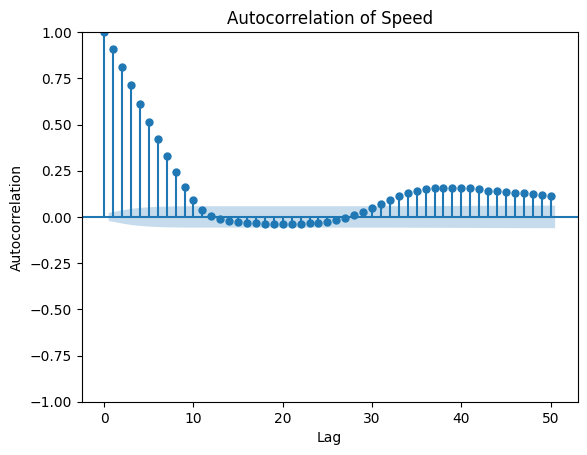

<Figure size 1200x600 with 0 Axes>

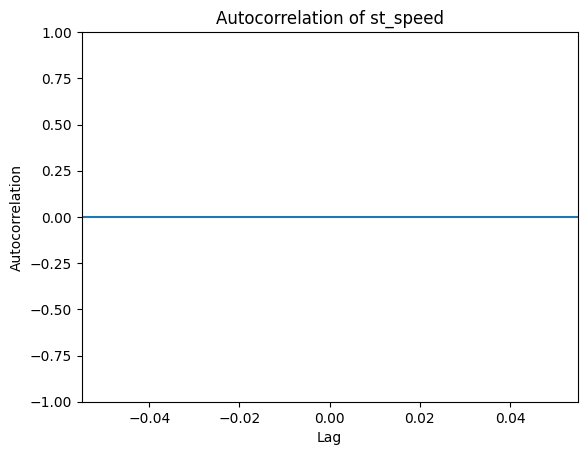

<Figure size 1200x600 with 0 Axes>

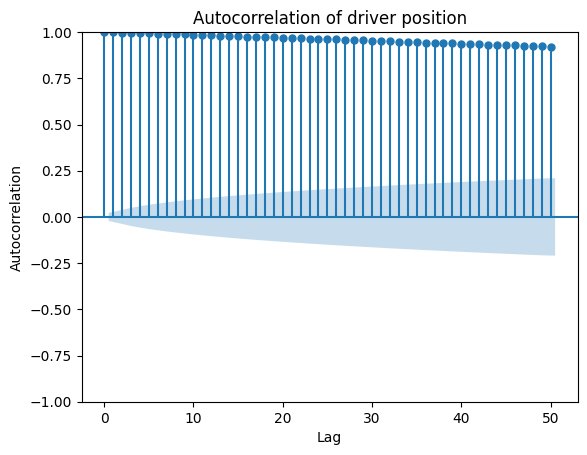

In [ ]:
# Checking for autocorrelation in speed, st_speed and position columns with respect to time, also label x and y axis

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# Convert 'car_time' to datetime if it's not already
if not pd.api.types.is_datetime64_any_dtype(df['car_time']):
    df['car_time'] = pd.to_datetime(df['car_time'])

# Set 'car_time' as the index
df = df.set_index('car_time')

# Plot autocorrelation for 'speed'
plt.figure(figsize=(12, 6))
plot_acf(df['speed'], lags=50)  # Adjust 'lags' as needed
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Speed")
plt.show()

# Plot autocorrelation for 'st_speed'
plt.figure(figsize=(12, 6))
plot_acf(df['st_speed'], lags=50)  # Adjust 'lags' as needed
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of st_speed")
plt.show()

# Plot autocorrelation for 'st_speed'
plt.figure(figsize=(12, 6))
plot_acf(df['driver_position'], lags=50)  # Adjust 'lags' as needed
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of driver position")
plt.show()

In [ ]:
df1= df[df['driver_number']==1]
df1['pit_duration'].value_counts()

pit_duration
0.0     2980
43.7      24
29.0      24
22.1      21
28.3      12
Name: count, dtype: int64

In [ ]:
df1['pit_duration'].describe()

count    3061.000000
mean        0.832571
std         5.231942
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        43.700000
Name: pit_duration, dtype: float64

In [ ]:
 df1[df1['lap_number'] == 2]['st_speed'].describe()

count     84.000000
mean     263.309524
std       54.508754
min      201.000000
25%      201.000000
50%      303.000000
75%      316.000000
max      316.000000
Name: st_speed, dtype: float64

#Separate dataframes for each driver in each session are created here

In [ ]:
df1s1= df1[df1['session_key'] == 9625]
df1s2= df1[df1['session_key'] == 9507]
df1s3= df1[df1['session_key'] == 9558]

In [ ]:
df16= df[df['driver_number']==16]
df16.head(1)

session_key  driver_number  lap_number  \
car_time                                                                   
2024-05-05 20:05:06.009000+00:00         9507             16           2   

                                   rpm  speed  n_gear  throttle  brake  drs  \
car_time                                                                      
2024-05-05 20:05:06.009000+00:00  7131     98       3         0      0    1   

                                  car_meeting_key  ...  duration_sector_1  \
car_time                                           ...                      
2024-05-05 20:05:06.009000+00:00             1234  ...             31.481   

                                  duration_sector_2  duration_sector_3  \
car_time                                                                 
2024-05-05 20:05:06.009000+00:00             35.738             26.098   

                                                 lap_start  \
car_time                                                     
2024-05-05 20:05:06.009000+00:00  2024-05-05T20:04:59.946Z   

                                              lap_end  \
car_time                                                
2024-05-05 20:05:06.009000+00:00  2024-05-05 20:06:32   

                                             position_time driver_position  \
car_time                                                                     
2024-05-05 20:05:06.009000+00:00  2024-05-05T19:07:45.052Z               2   

                                  pit_duration        date             time  
car_time                                                                     
2024-05-05 20:05:06.009000+00:00           0.0  2024-05-05  20:05:06.009000  

[1 rows x 37 columns]

In [ ]:
df23= df[df['driver_number']==23]
df23.head(1)

session_key  driver_number  lap_number  \
car_time                                                                   
2024-05-05 20:05:08.130000+00:00         9507             23           2   

                                    rpm  speed  n_gear  throttle  brake  drs  \
car_time                                                                       
2024-05-05 20:05:08.130000+00:00  11629    282       7       100      0    1   

                                  car_meeting_key  ...  duration_sector_1  \
car_time                                           ...                      
2024-05-05 20:05:08.130000+00:00             1234  ...             32.833   

                                  duration_sector_2  duration_sector_3  \
car_time                                                                 
2024-05-05 20:05:08.130000+00:00             36.217             25.875   

                                                 lap_start  \
car_time                                                     
2024-05-05 20:05:08.130000+00:00  2024-05-05T20:05:08.124Z   

                                              lap_end  \
car_time                                                
2024-05-05 20:05:08.130000+00:00  2024-05-05 20:06:42   

                                             position_time driver_position  \
car_time                                                                     
2024-05-05 20:05:08.130000+00:00  2024-05-05T20:05:07.471Z              15   

                                  pit_duration        date             time  
car_time                                                                     
2024-05-05 20:05:08.130000+00:00           0.0  2024-05-05  20:05:08.130000  

[1 rows x 37 columns]

In [ ]:
df16s1= df16[df16['session_key'] == 9625]
df16s2= df16[df16['session_key'] == 9507]
df16s3= df16[df16['session_key'] == 9558]

df23s1= df23[df23['session_key'] == 9507]
df23s2= df23[df23['session_key'] == 9625]
df23s3= df23[df23['session_key'] == 9558]

In [ ]:
df16s1.head(2)

session_key  driver_number  lap_number  \
car_time                                                                   
2024-10-27 20:06:22.175000+00:00         9625             16           2   
2024-10-27 20:06:22.335000+00:00         9625             16           2   

                                   rpm  speed  n_gear  throttle  brake  drs  \
car_time                                                                      
2024-10-27 20:06:22.175000+00:00  8002     89       2        54      0    1   
2024-10-27 20:06:22.335000+00:00  8404     96       2        59      0    1   

                                  car_meeting_key  ...  duration_sector_1  \
car_time                                           ...                      
2024-10-27 20:06:22.175000+00:00             1248  ...              61.38   
2024-10-27 20:06:22.335000+00:00             1248  ...              61.38   

                                  duration_sector_2  duration_sector_3  \
car_time                                                                 
2024-10-27 20:06:22.175000+00:00             46.583             30.289   
2024-10-27 20:06:22.335000+00:00             46.583             30.289   

                                                 lap_start  \
car_time                                                     
2024-10-27 20:06:22.175000+00:00  2024-10-27T20:05:25.826Z   
2024-10-27 20:06:22.335000+00:00  2024-10-27T20:05:25.826Z   

                                              lap_end  \
car_time                                                
2024-10-27 20:06:22.175000+00:00  2024-10-27 20:07:43   
2024-10-27 20:06:22.335000+00:00  2024-10-27 20:07:43   

                                             position_time driver_position  \
car_time                                                                     
2024-10-27 20:06:22.175000+00:00  2024-10-27T19:07:44.022Z               4   
2024-10-27 20:06:22.335000+00:00  2024-10-27T19:07:44.022Z               4   

                                  pit_duration        date             time  
car_time                                                                     
2024-10-27 20:06:22.175000+00:00           0.0  2024-10-27  20:06:22.175000  
2024-10-27 20:06:22.335000+00:00           0.0  2024-10-27  20:06:22.335000  

[2 rows x 37 columns]

In [ ]:
df23s1.head(2)

session_key  driver_number  lap_number  \
car_time                                                                   
2024-05-05 20:05:08.130000+00:00         9507             23           2   
2024-05-05 20:05:08.370000+00:00         9507             23           2   

                                    rpm  speed  n_gear  throttle  brake  drs  \
car_time                                                                       
2024-05-05 20:05:08.130000+00:00  11629    282       7       100      0    1   
2024-05-05 20:05:08.370000+00:00  11634    283       7       100      0    1   

                                  car_meeting_key  ...  duration_sector_1  \
car_time                                           ...                      
2024-05-05 20:05:08.130000+00:00             1234  ...             32.833   
2024-05-05 20:05:08.370000+00:00             1234  ...             32.833   

                                  duration_sector_2  duration_sector_3  \
car_time                                                                 
2024-05-05 20:05:08.130000+00:00             36.217             25.875   
2024-05-05 20:05:08.370000+00:00             36.217             25.875   

                                                 lap_start  \
car_time                                                     
2024-05-05 20:05:08.130000+00:00  2024-05-05T20:05:08.124Z   
2024-05-05 20:05:08.370000+00:00  2024-05-05T20:05:08.124Z   

                                              lap_end  \
car_time                                                
2024-05-05 20:05:08.130000+00:00  2024-05-05 20:06:42   
2024-05-05 20:05:08.370000+00:00  2024-05-05 20:06:42   

                                             position_time driver_position  \
car_time                                                                     
2024-05-05 20:05:08.130000+00:00  2024-05-05T20:05:07.471Z              15   
2024-05-05 20:05:08.370000+00:00  2024-05-05T20:05:07.471Z              15   

                                  pit_duration        date             time  
car_time                                                                     
2024-05-05 20:05:08.130000+00:00           0.0  2024-05-05  20:05:08.130000  
2024-05-05 20:05:08.370000+00:00           0.0  2024-05-05  20:05:08.370000  

[2 rows x 37 columns]

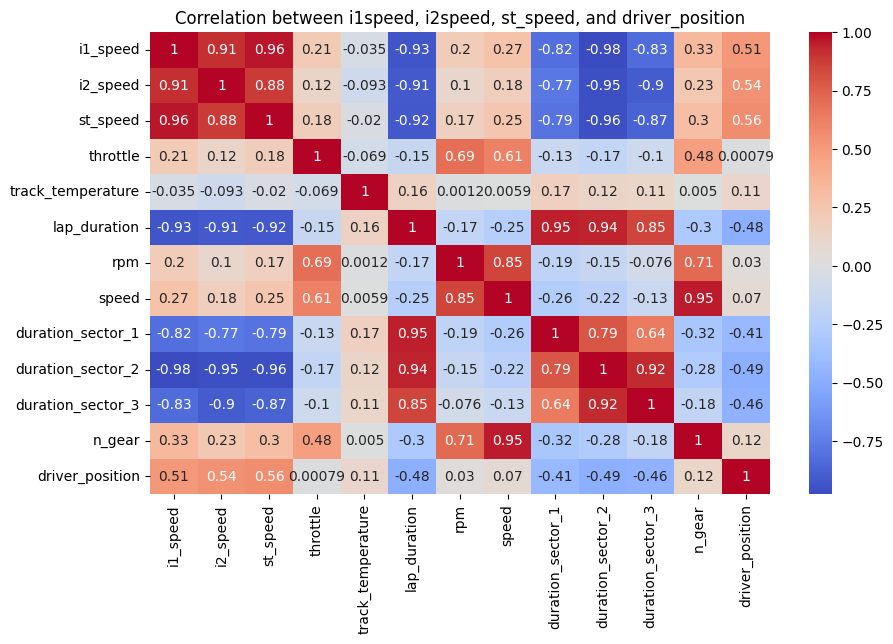

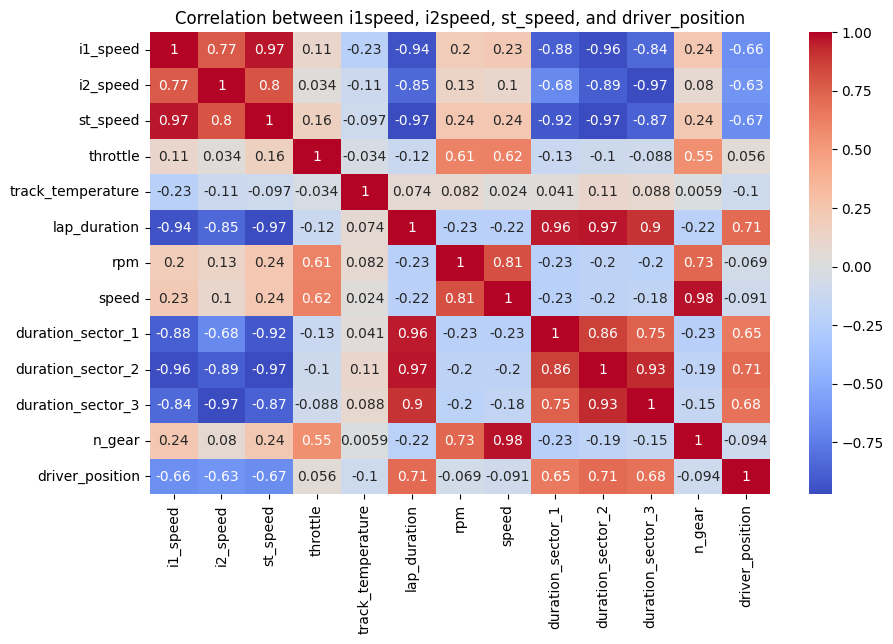

In [ ]:
# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df1s1[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()

# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df16s1[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()


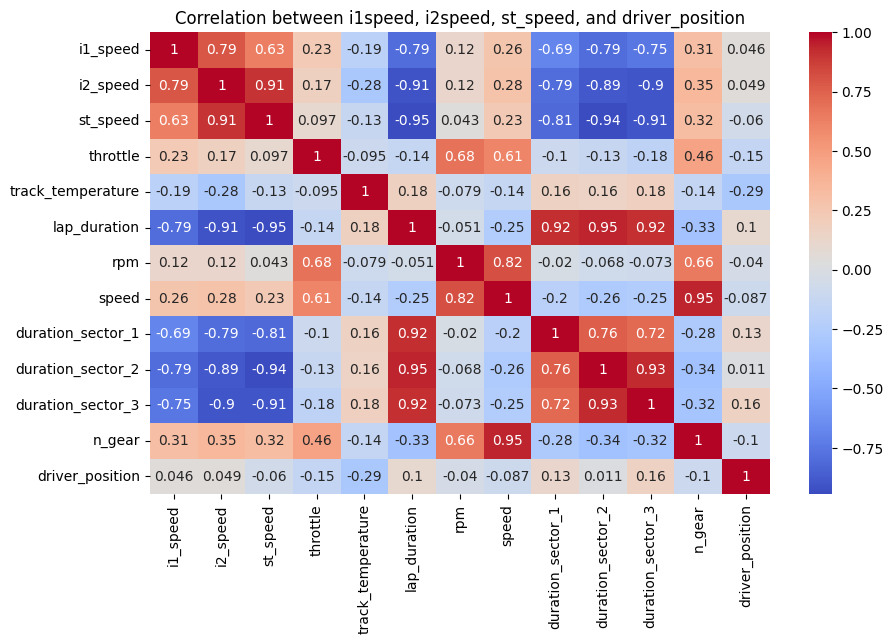

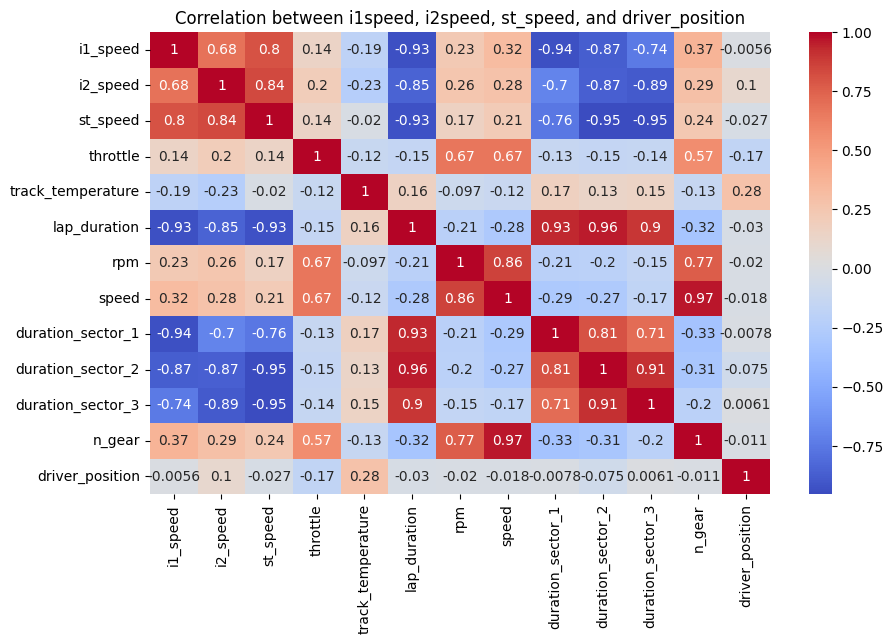

In [ ]:
# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df1s2[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()

# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df16s2[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()

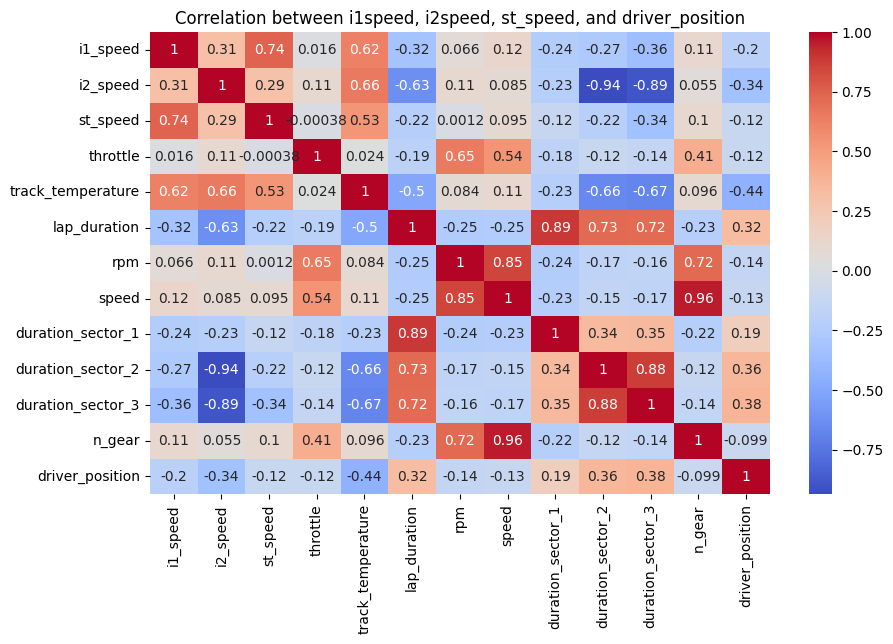

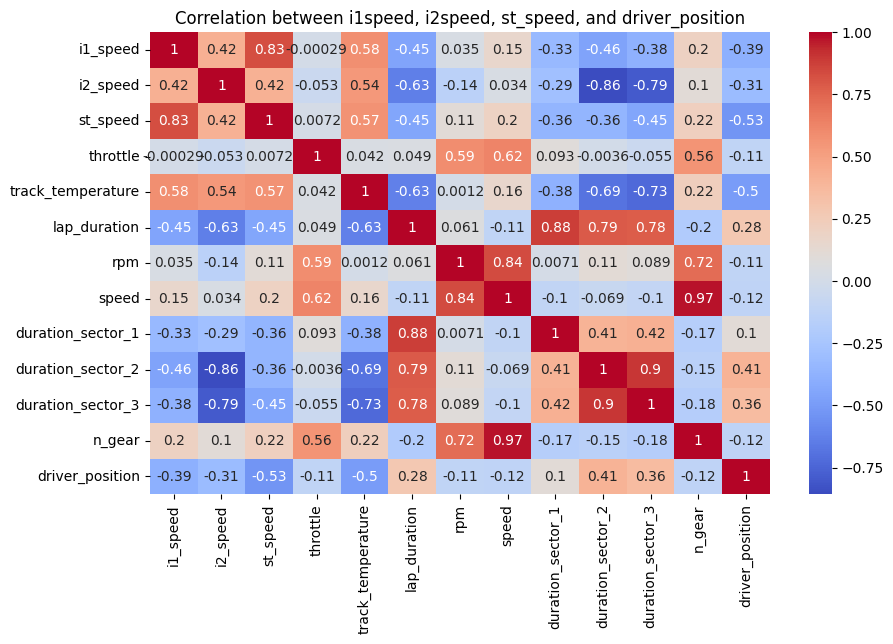

In [ ]:
# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df1s3[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()

# Correlation plot between i1speed, i2speed, st_speed and driver_position
plt.figure(figsize=(10, 6))
sns.heatmap(df16s3[['i1_speed', 'i2_speed', 'st_speed', 'throttle', 'track_temperature', 'lap_duration', 'rpm', 'speed', 'duration_sector_1', 'duration_sector_2', 'duration_sector_3', 'n_gear', 'driver_position']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between i1speed, i2speed, st_speed, and driver_position')
plt.show()

In [ ]:
df1['session_key'].value_counts()

session_key
9625    1123
9507    1019
9558     919
Name: count, dtype: int64

In [ ]:
print(df[df['session_key'] == 9625]['driver_number'].value_counts(), '\n')
print(df[df['session_key'] == 9507]['driver_number'].value_counts(), '\n')
print(df[df['session_key'] == 9558]['driver_number'].value_counts())

driver_number
1     1123
16    1093
Name: count, dtype: int64 

driver_number
1     1019
23    1017
16    1010
Name: count, dtype: int64 

driver_number
23    922
1     919
16    906
Name: count, dtype: int64


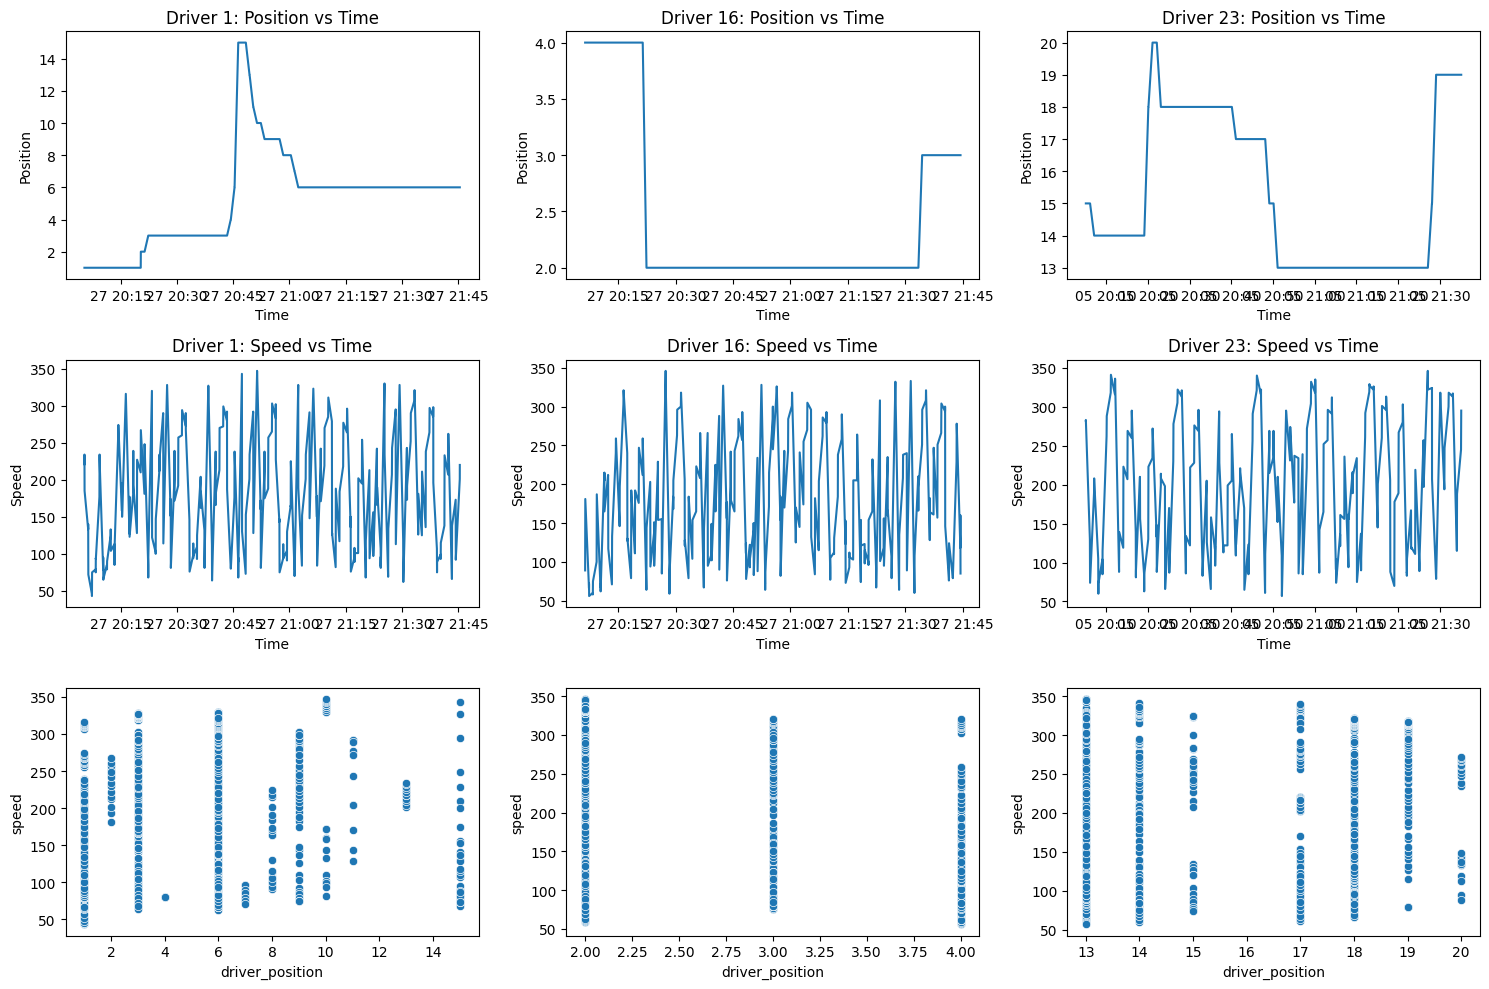

In [ ]:
# Plotting position vs time and speed vs time for all the three drivers

import matplotlib.pyplot as plt
import seaborn as sns

drivers = {
    1: df1s1,
    16: df16s1,
    23: df23s1
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Time
    sns.lineplot(x='car_time', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Time')
    axes[0, i].set_xlabel('Time')
    axes[0, i].set_ylabel('Position')

    # Speed vs Time
    sns.lineplot(x='car_time', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Time')
    axes[1, i].set_xlabel('Time')
    axes[1, i].set_ylabel('Speed')

    # Driver Position vs Speed
    sns.scatterplot(x='driver_position', y='speed', data=driver_df, ax=axes[2, i])

plt.tight_layout()
plt.show()


In [ ]:
df['session_key'].value_counts()

session_key
9507    3046
9558    2747
9625    2216
Name: count, dtype: int64

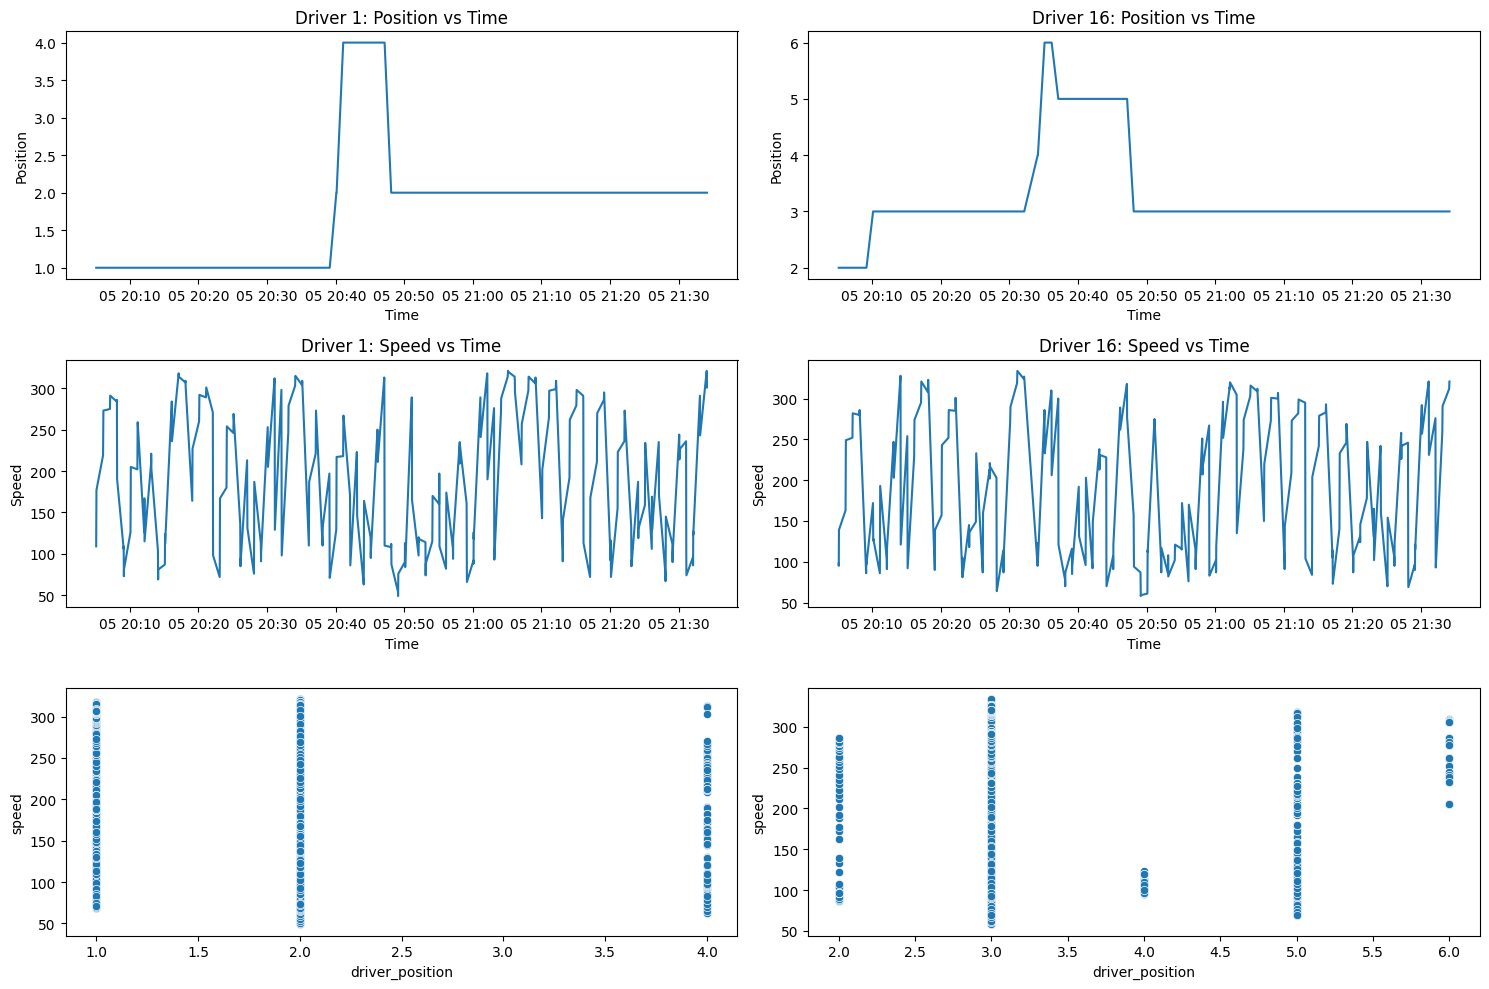

In [ ]:
drivers = {
    1: df1s2,
    16: df16s2
}

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Time
    sns.lineplot(x='car_time', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Time')
    axes[0, i].set_xlabel('Time')
    axes[0, i].set_ylabel('Position')

    # Speed vs Time
    sns.lineplot(x='car_time', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Time')
    axes[1, i].set_xlabel('Time')
    axes[1, i].set_ylabel('Speed')

    # Driver Position vs Speed
    sns.scatterplot(x='driver_position', y='speed', data=driver_df, ax=axes[2, i])

plt.tight_layout()
plt.show()

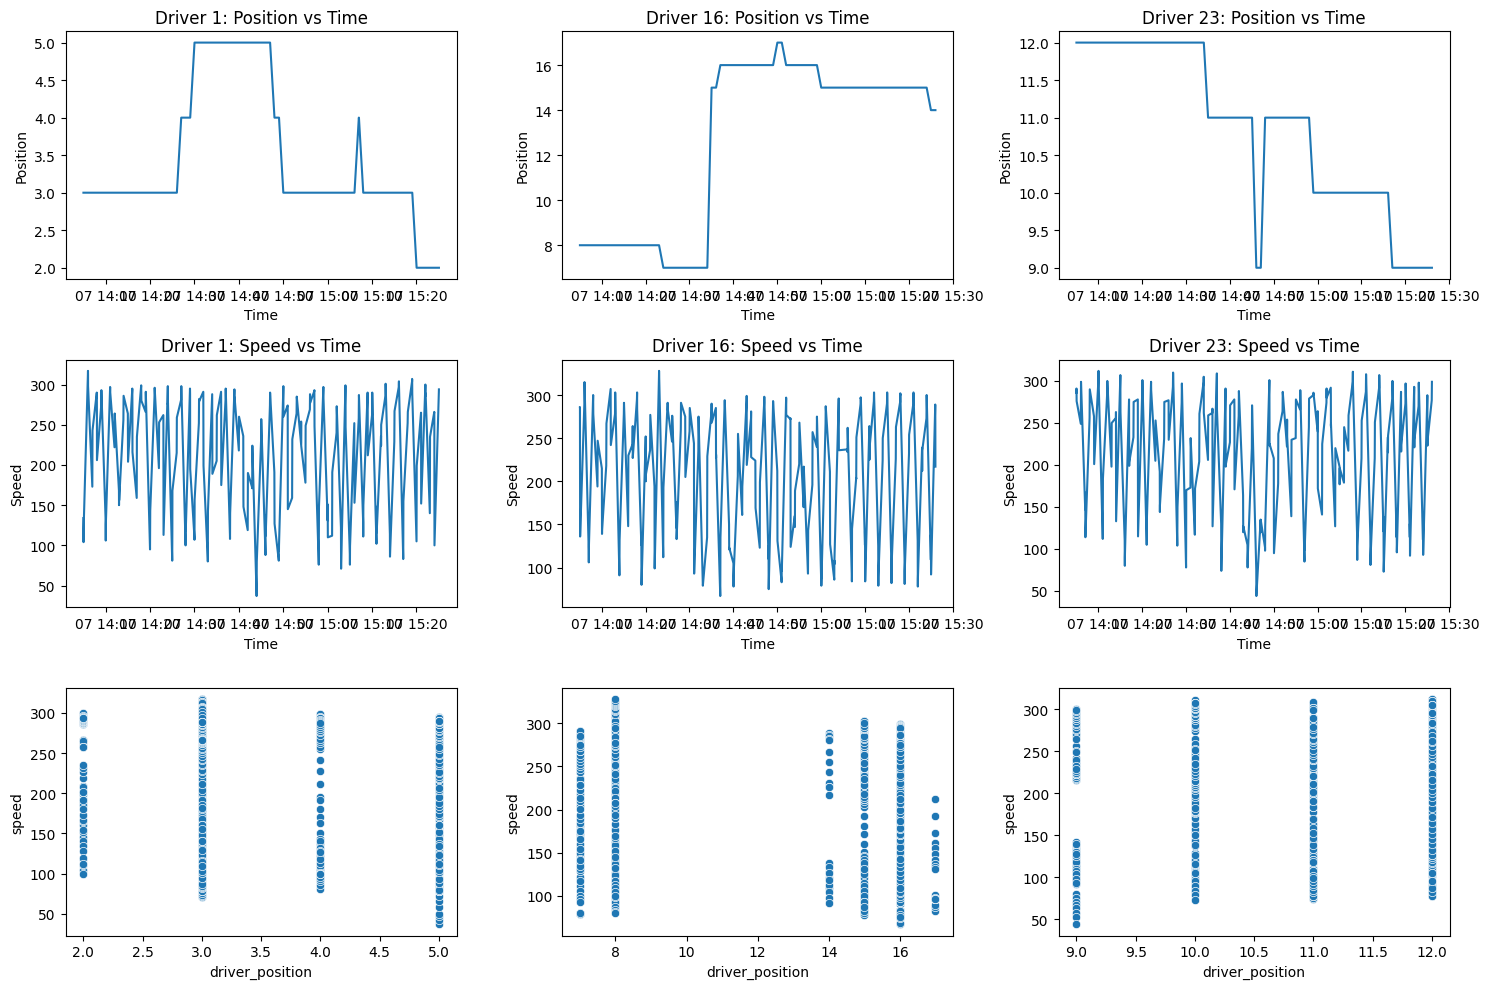

In [ ]:
drivers = {
    1: df1s3,
    16: df16s3,
    23: df23s3
}

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Time
    sns.lineplot(x='car_time', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Time')
    axes[0, i].set_xlabel('Time')
    axes[0, i].set_ylabel('Position')

    # Speed vs Time
    sns.lineplot(x='car_time', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Time')
    axes[1, i].set_xlabel('Time')
    axes[1, i].set_ylabel('Speed')

    # Driver Position vs Speed
    sns.scatterplot(x='driver_position', y='speed', data=driver_df, ax=axes[2, i])

plt.tight_layout()
plt.show()

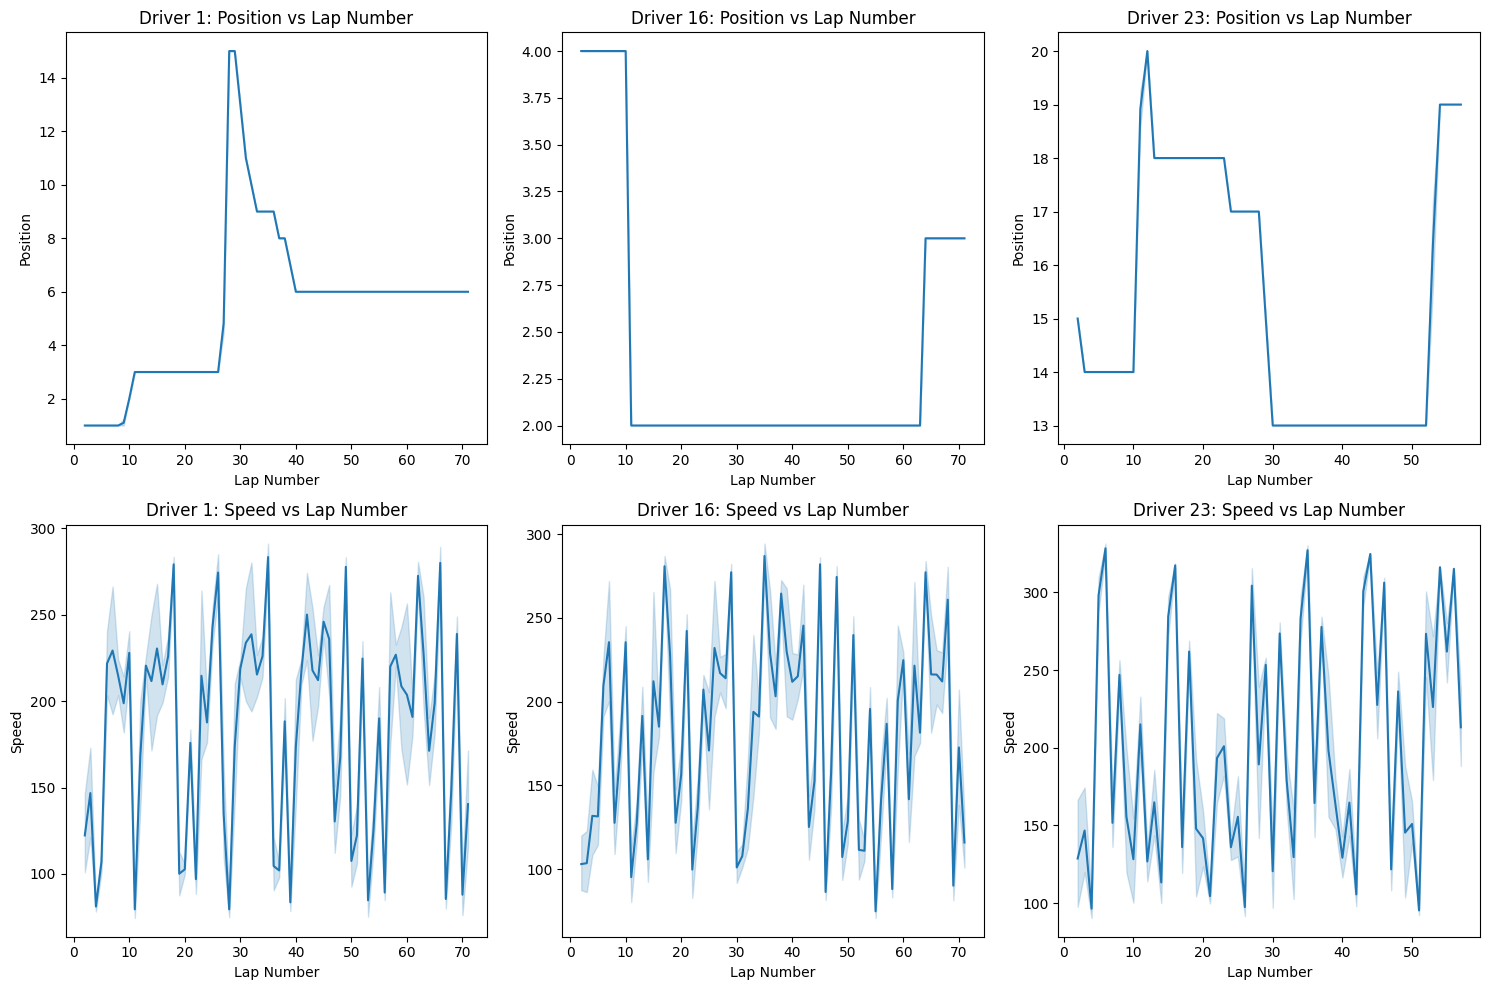

In [ ]:
#Plotting position vs lap number and speed vs lap number for all the three drivers

drivers = {
    1: df1s1,
    16: df16s1,
    23: df23s1
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Lap Number
    sns.lineplot(x='lap_number', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Lap Number')
    axes[0, i].set_xlabel('Lap Number')
    axes[0, i].set_ylabel('Position')

    # Speed vs Lap Number
    sns.lineplot(x='lap_number', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Lap Number')
    axes[1, i].set_xlabel('Lap Number')
    axes[1, i].set_ylabel('Speed')


plt.tight_layout()
plt.show()


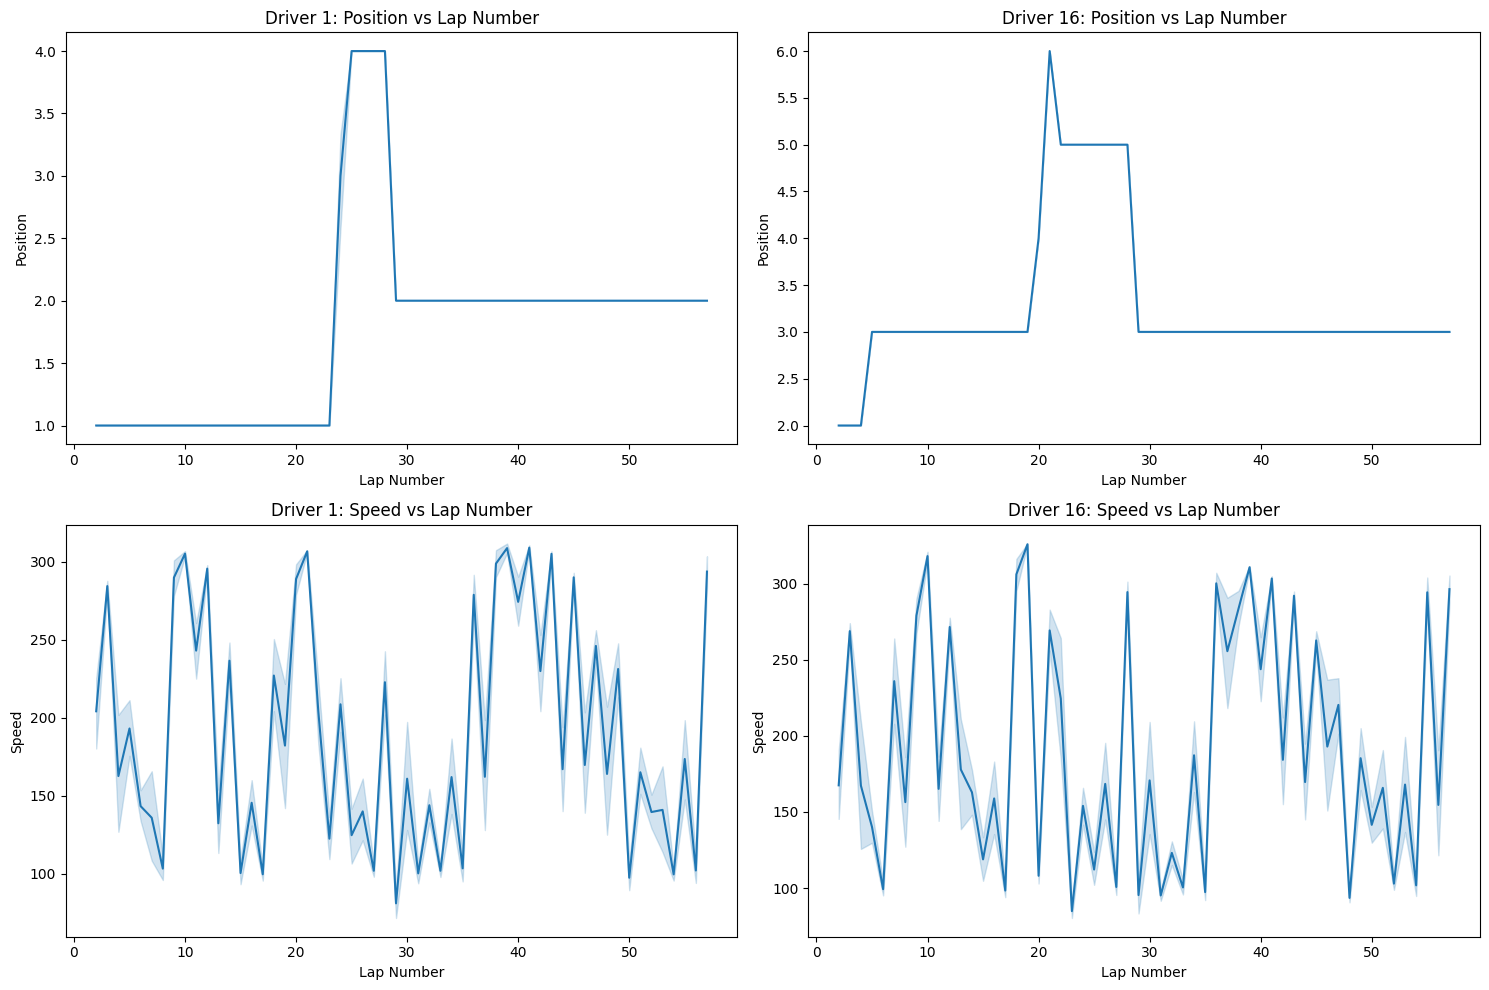

In [ ]:
drivers = {
    1: df1s2,
    16: df16s2
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Lap Number
    sns.lineplot(x='lap_number', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Lap Number')
    axes[0, i].set_xlabel('Lap Number')
    axes[0, i].set_ylabel('Position')

    # Speed vs Lap Number
    sns.lineplot(x='lap_number', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Lap Number')
    axes[1, i].set_xlabel('Lap Number')
    axes[1, i].set_ylabel('Speed')


plt.tight_layout()
plt.show()


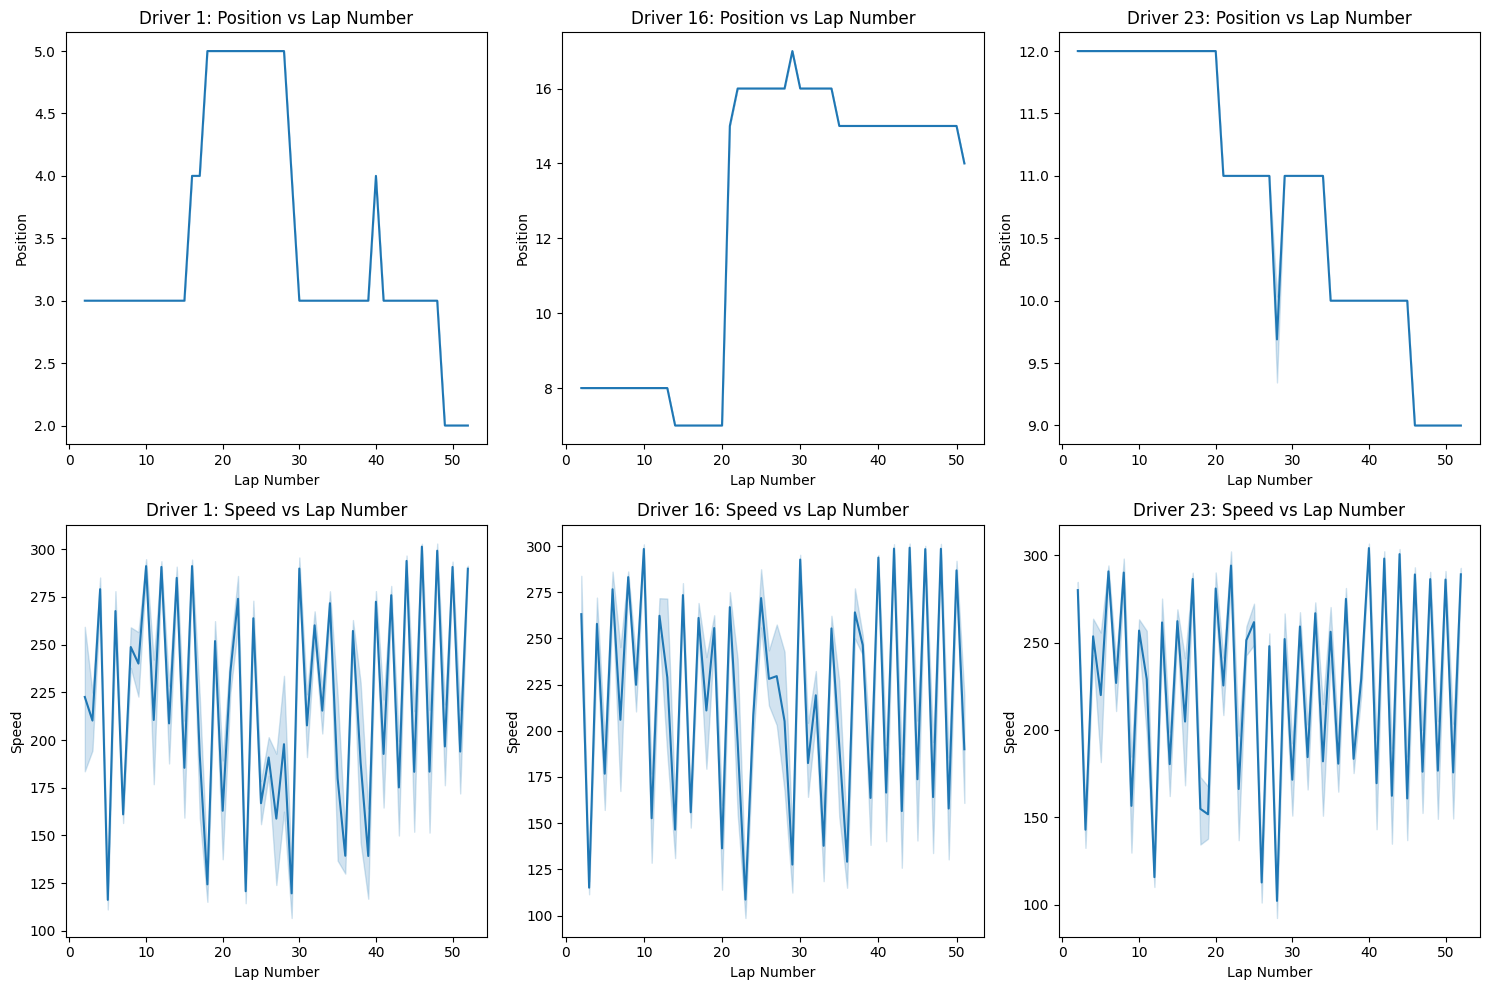

In [ ]:
drivers = {
    1: df1s3,
    16: df16s3,
    23: df23s3
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Lap Number
    sns.lineplot(x='lap_number', y='driver_position', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Lap Number')
    axes[0, i].set_xlabel('Lap Number')
    axes[0, i].set_ylabel('Position')

    # Speed vs Lap Number
    sns.lineplot(x='lap_number', y='speed', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Speed vs Lap Number')
    axes[1, i].set_xlabel('Lap Number')
    axes[1, i].set_ylabel('Speed')


plt.tight_layout()
plt.show()


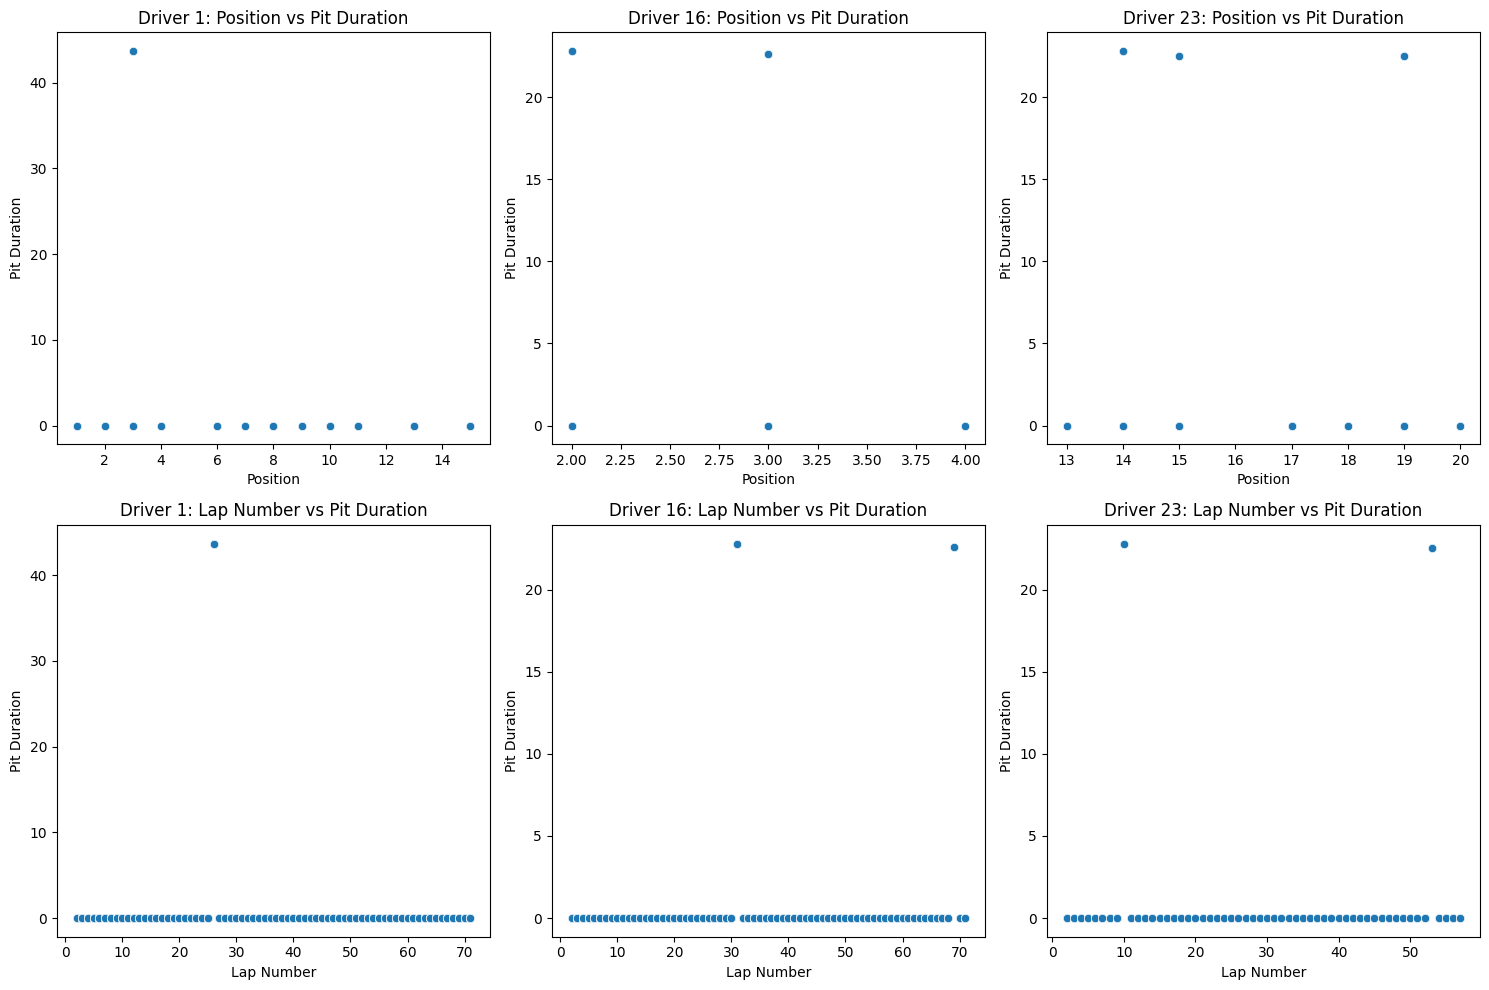

In [ ]:
#Plotting position vs pit_duration and lap number vs pit_duration for all the three drivers

import matplotlib.pyplot as plt
import seaborn as sns

drivers = {
    1: df1s1,
    16: df16s1,
    23: df23s1
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Position vs Pit Duration
    sns.scatterplot(x='driver_position', y='pit_duration', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Position vs Pit Duration')
    axes[0, i].set_xlabel('Position')
    axes[0, i].set_ylabel('Pit Duration')

    # Lap Number vs Pit Duration
    sns.scatterplot(x='lap_number', y='pit_duration', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Lap Number vs Pit Duration')
    axes[1, i].set_xlabel('Lap Number')
    axes[1, i].set_ylabel('Pit Duration')

plt.tight_layout()
plt.show()


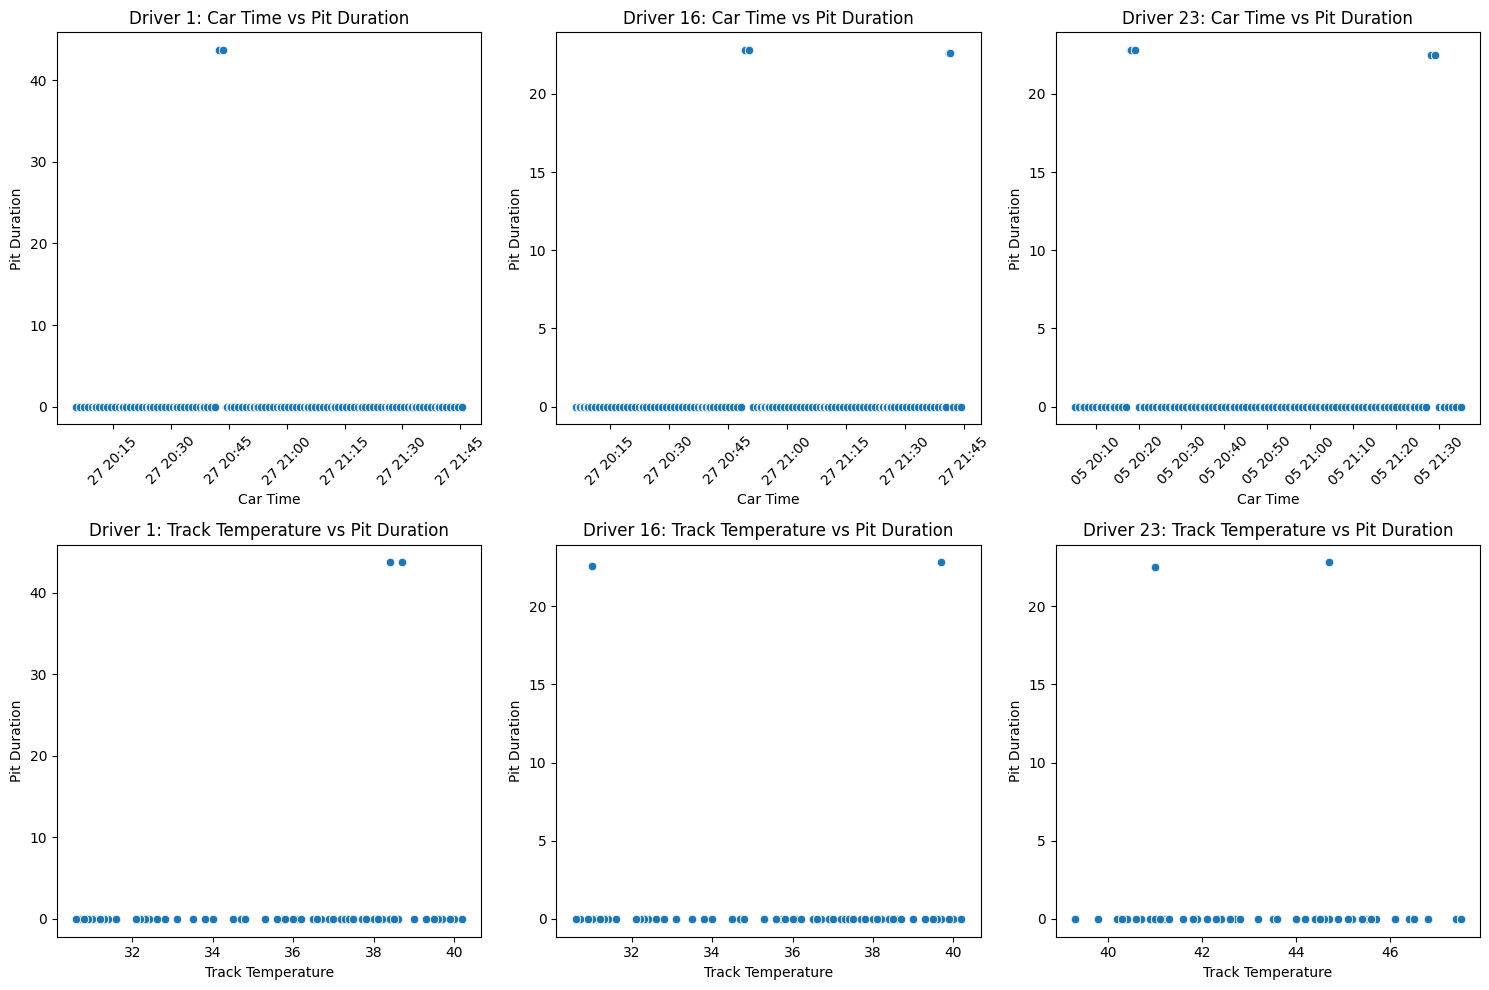

In [ ]:
# Plot car_time vs pit_duration and track_temperature vs pit_duration for all the three drivers

import matplotlib.pyplot as plt
import seaborn as sns

drivers = {
    1: df1s1,
    16: df16s1,
    23: df23s1
}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (driver_number, driver_df) in enumerate(drivers.items()):
    # Car Time vs Pit Duration
    sns.scatterplot(x='car_time', y='pit_duration', data=driver_df, ax=axes[0, i])
    axes[0, i].set_title(f'Driver {driver_number}: Car Time vs Pit Duration')
    axes[0, i].set_xlabel('Car Time')
    axes[0, i].set_ylabel('Pit Duration')
    plt.setp(axes[0,i].get_xticklabels(), rotation=45)

    # Track Temperature vs Pit Duration
    sns.scatterplot(x='track_temperature', y='pit_duration', data=driver_df, ax=axes[1, i])
    axes[1, i].set_title(f'Driver {driver_number}: Track Temperature vs Pit Duration')
    axes[1, i].set_xlabel('Track Temperature')
    axes[1, i].set_ylabel('Pit Duration')

plt.tight_layout()
plt.show()


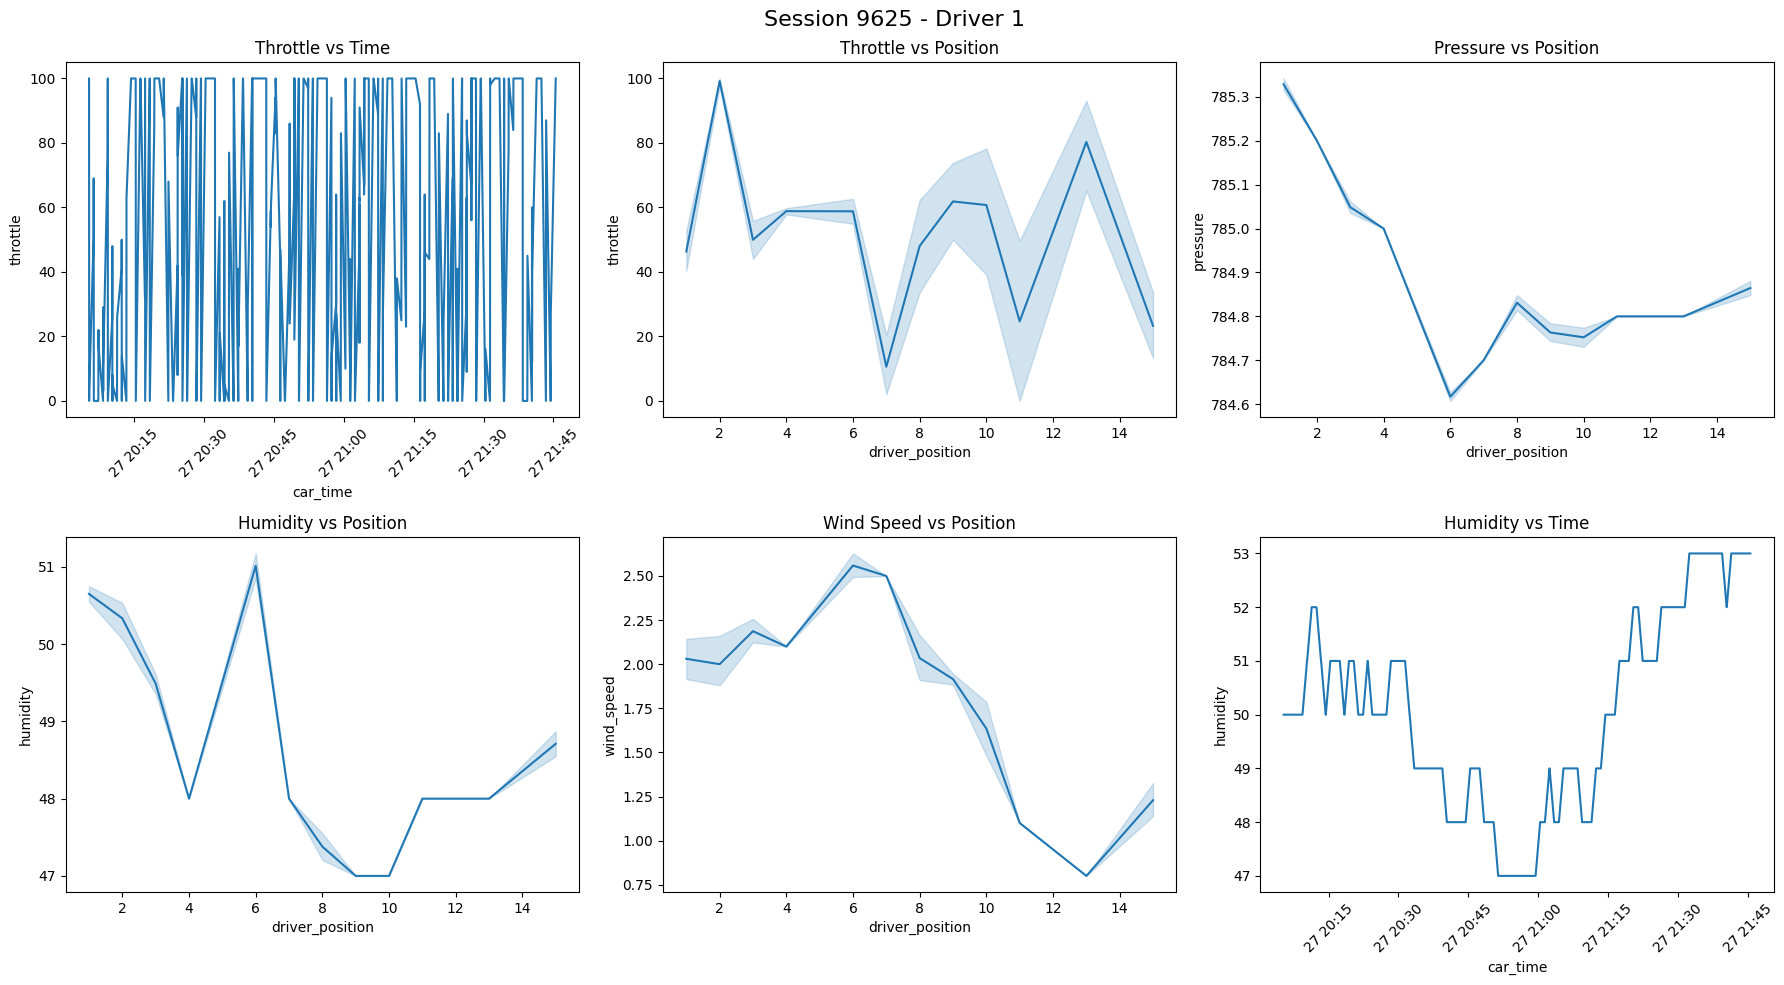

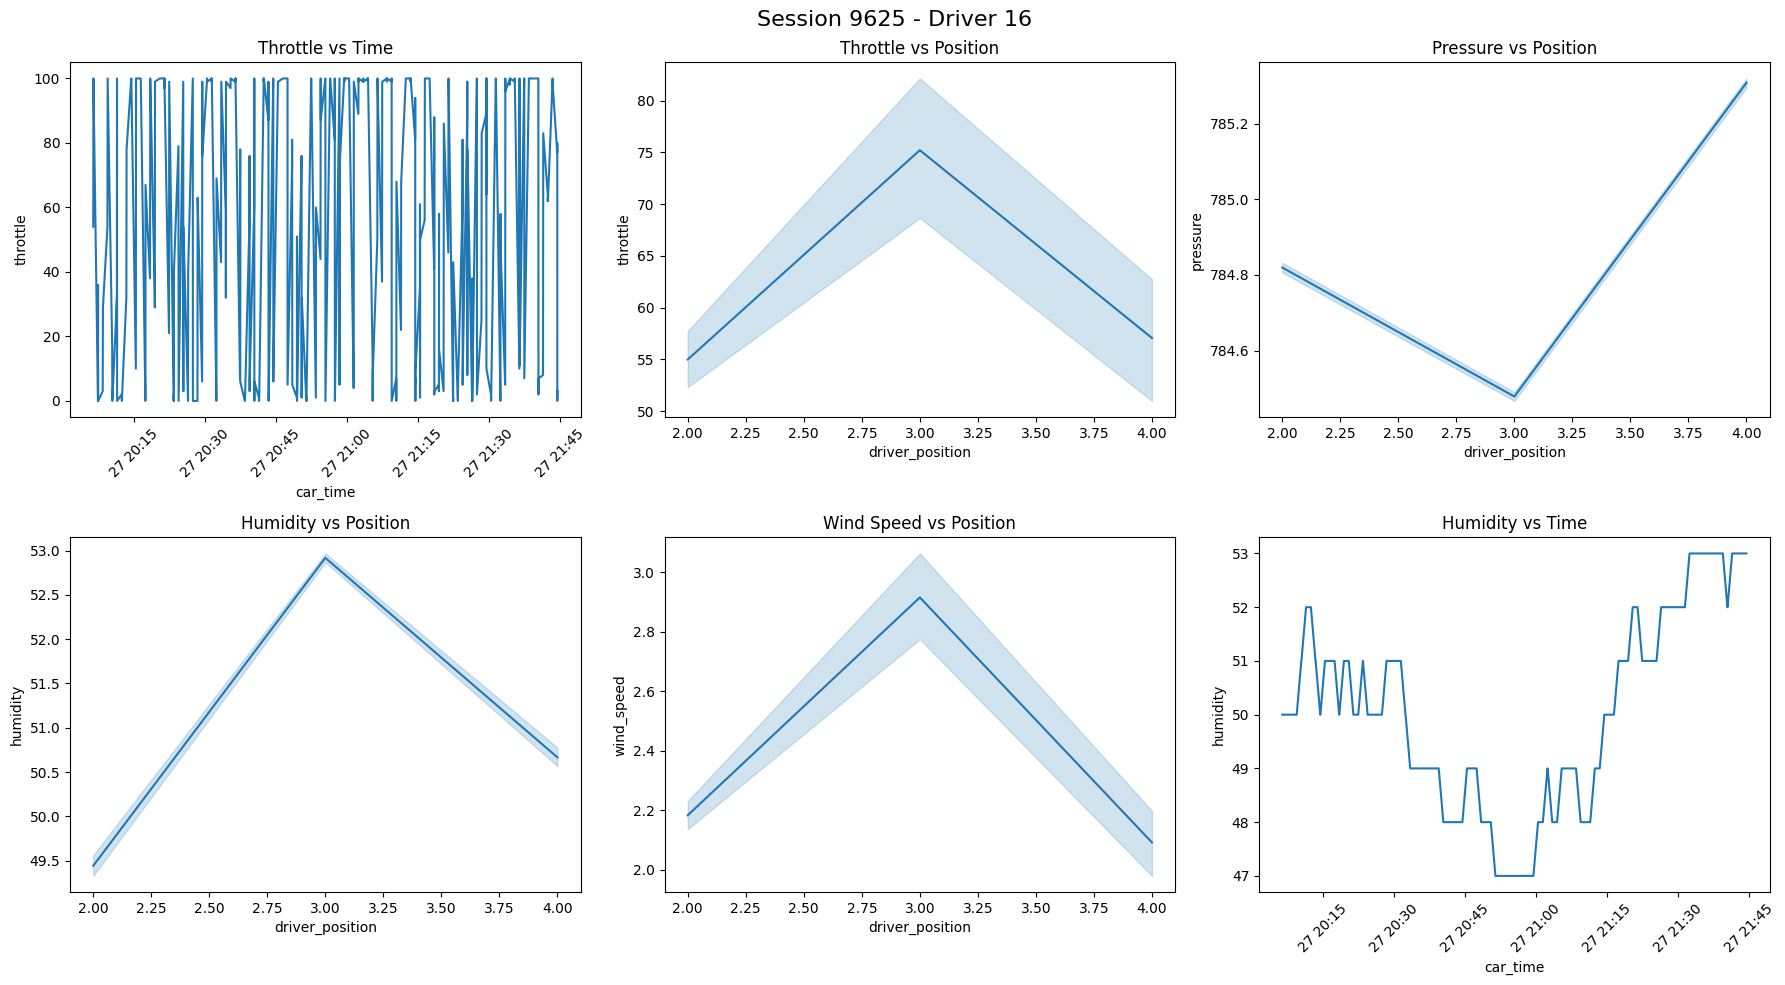

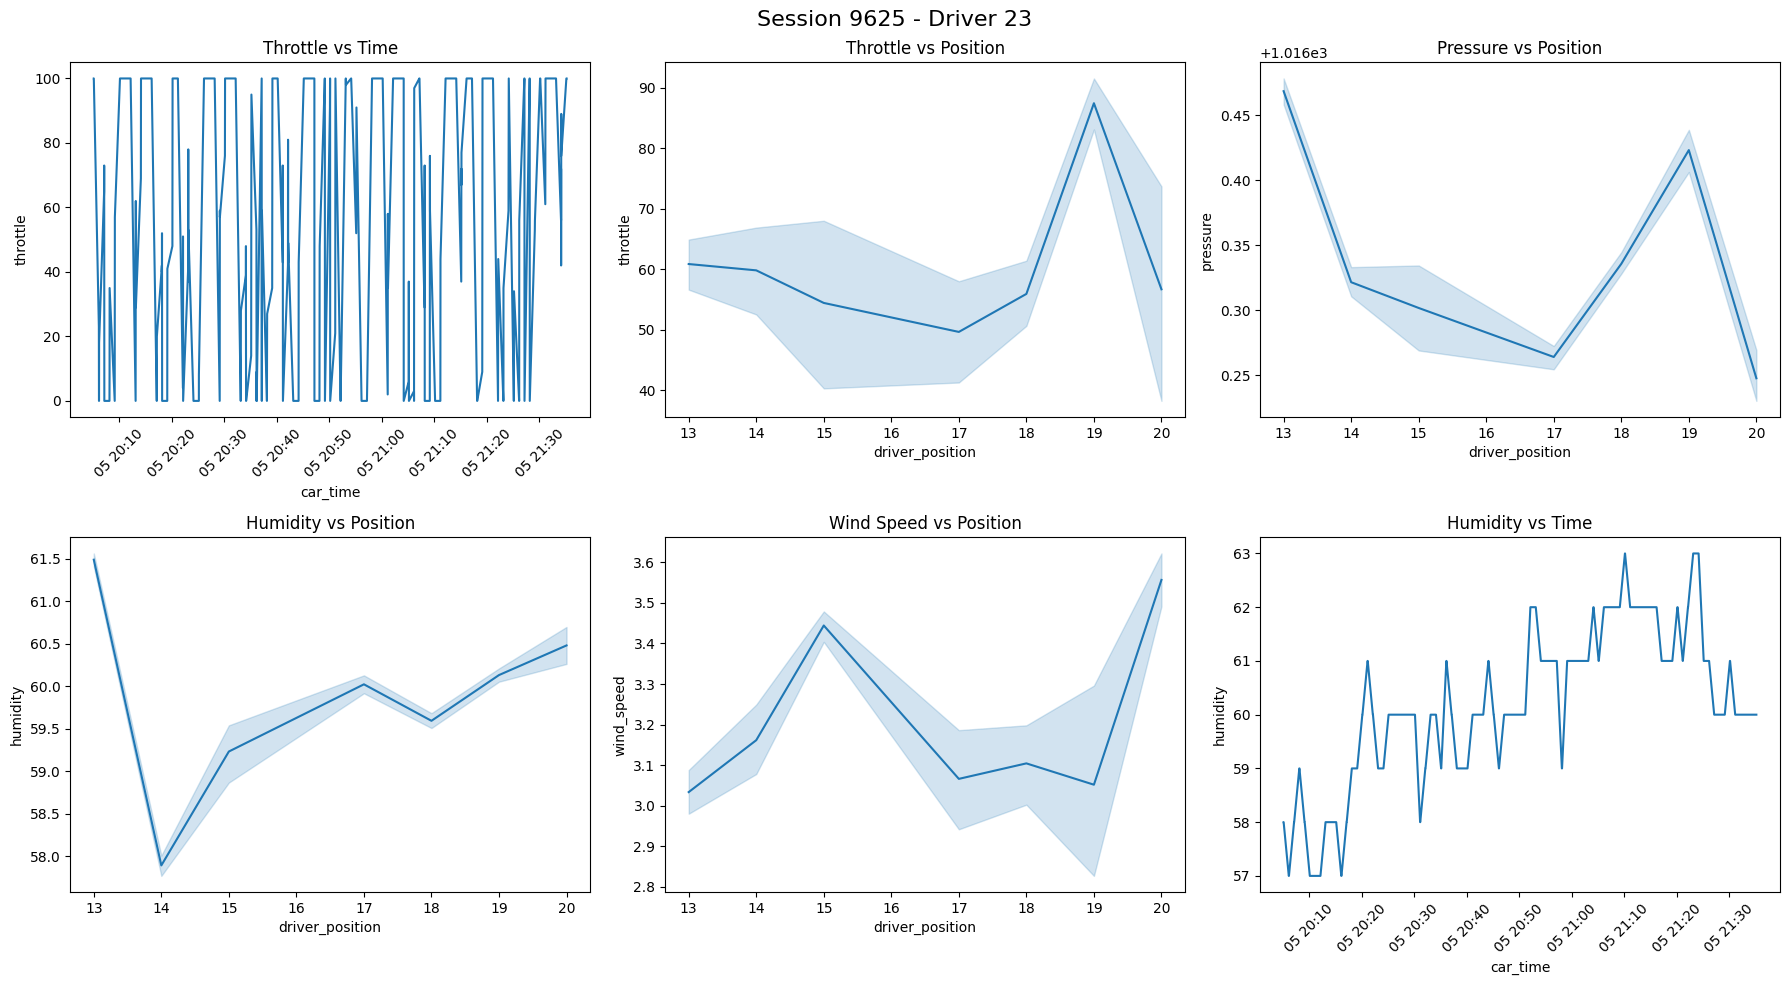

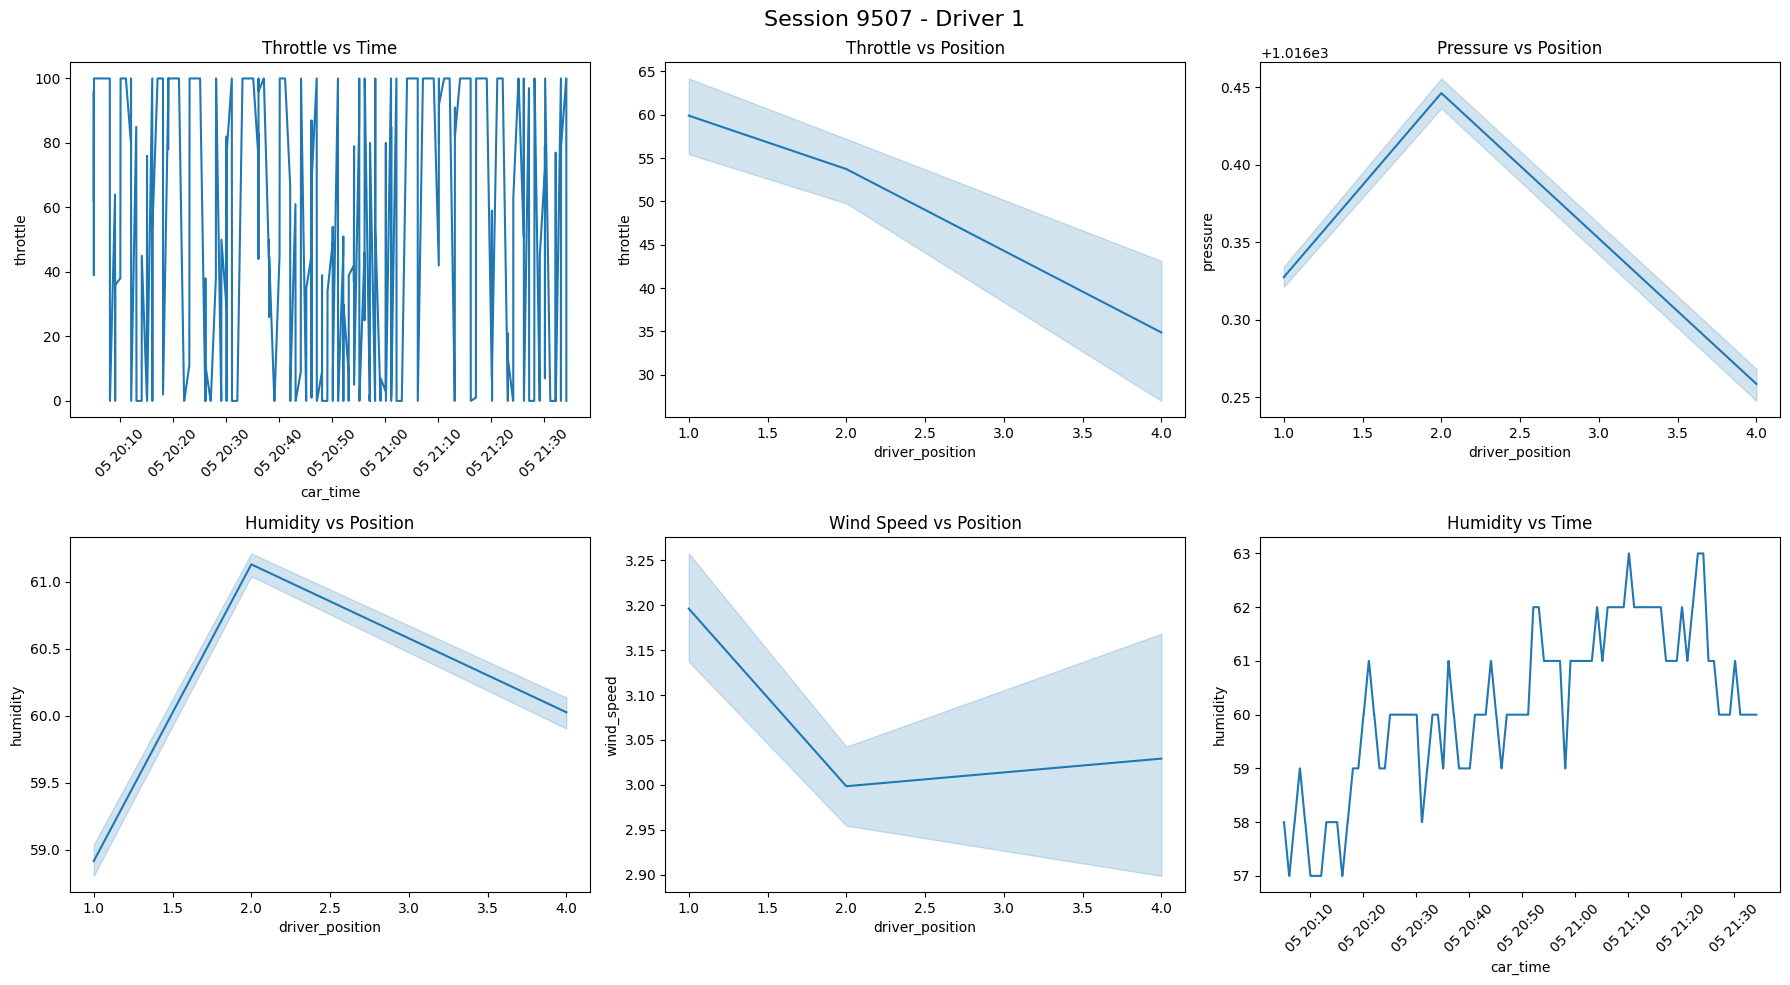

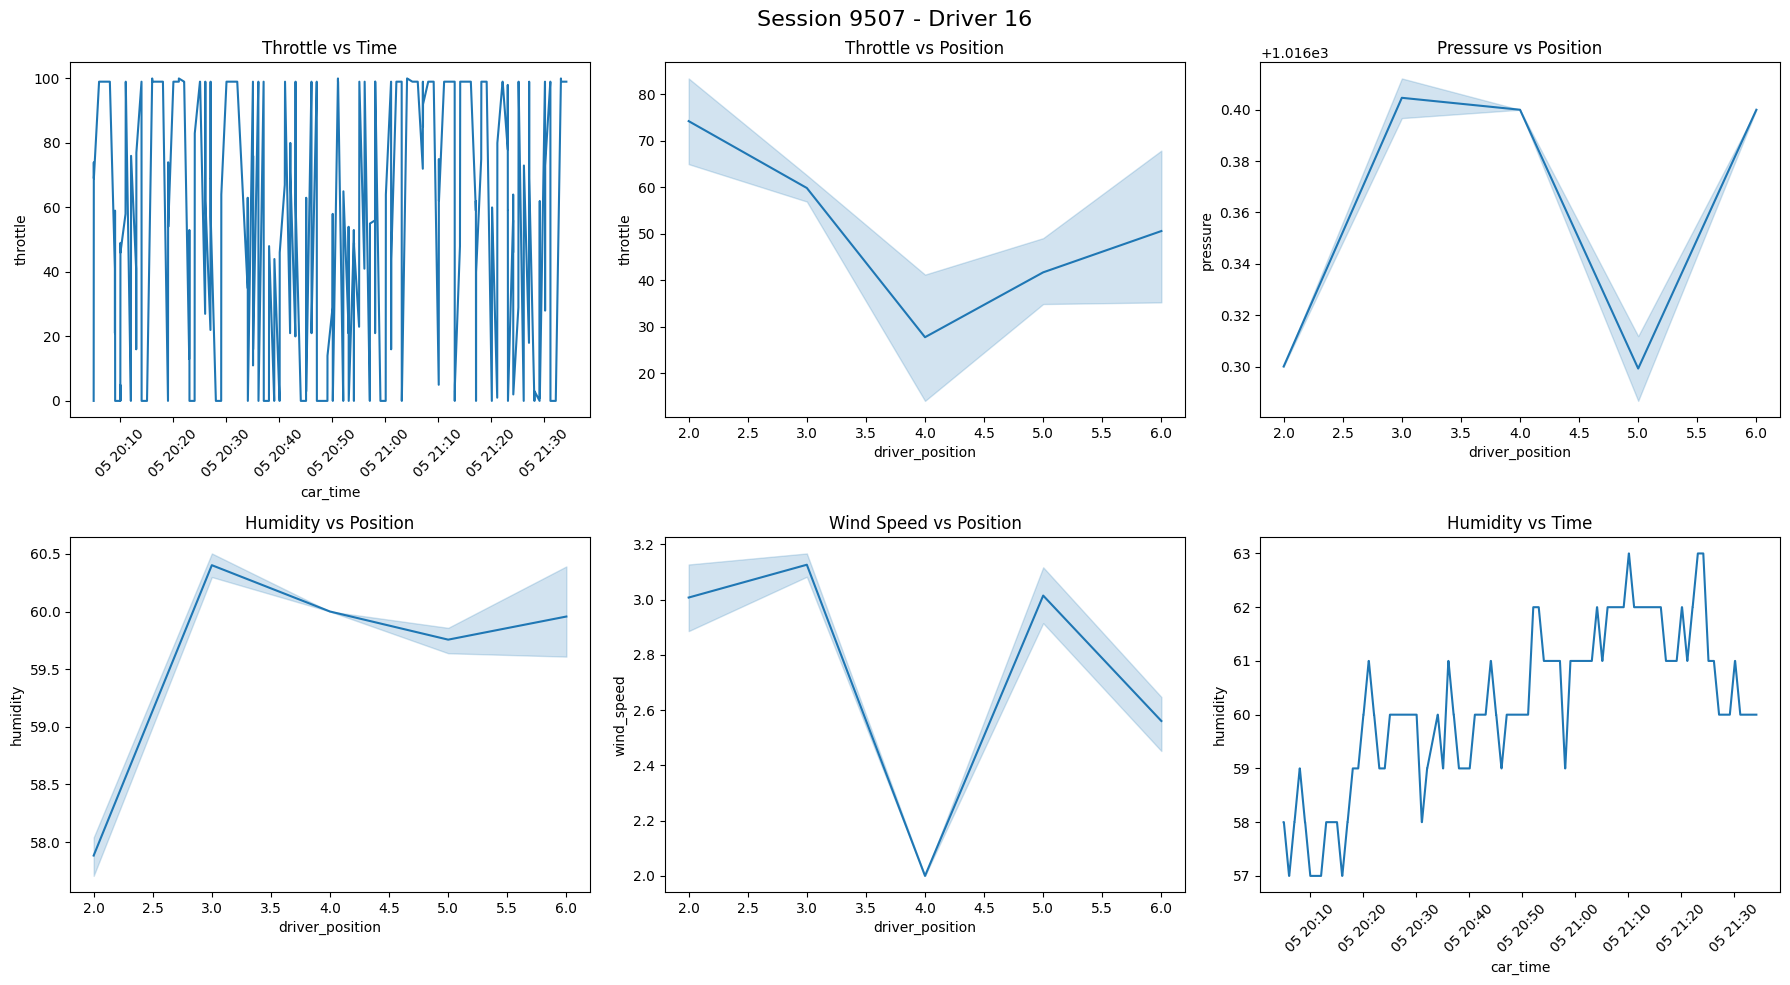

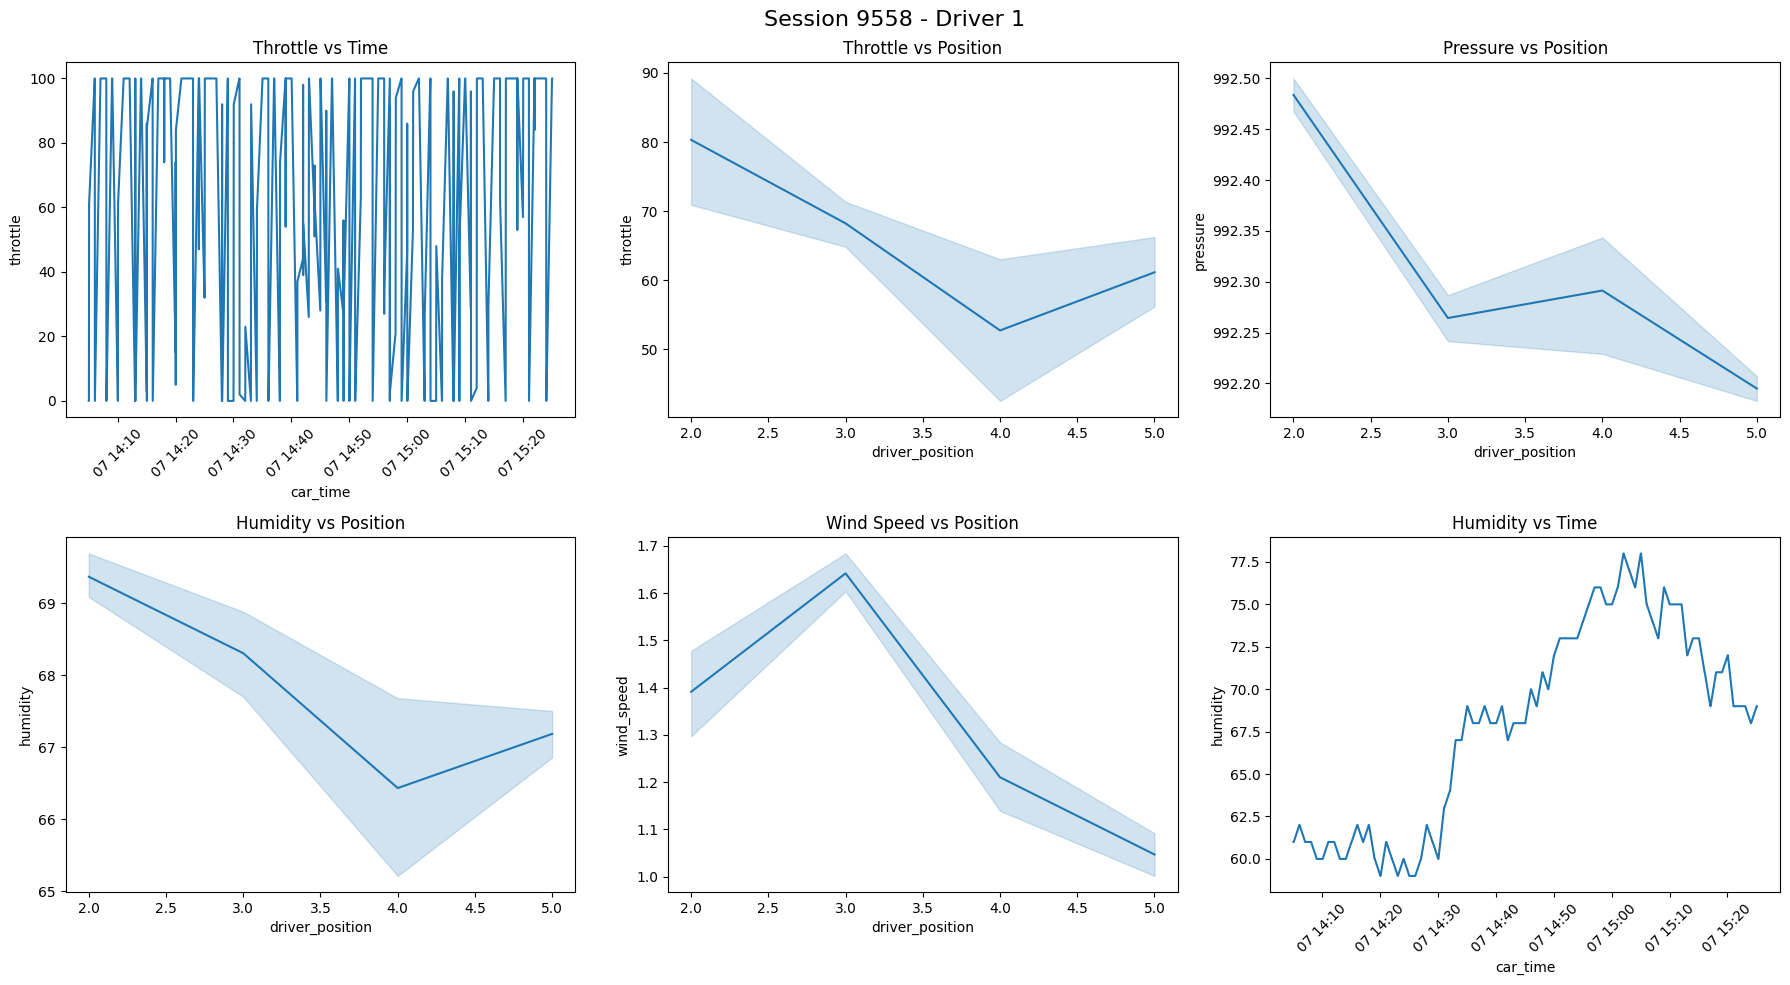

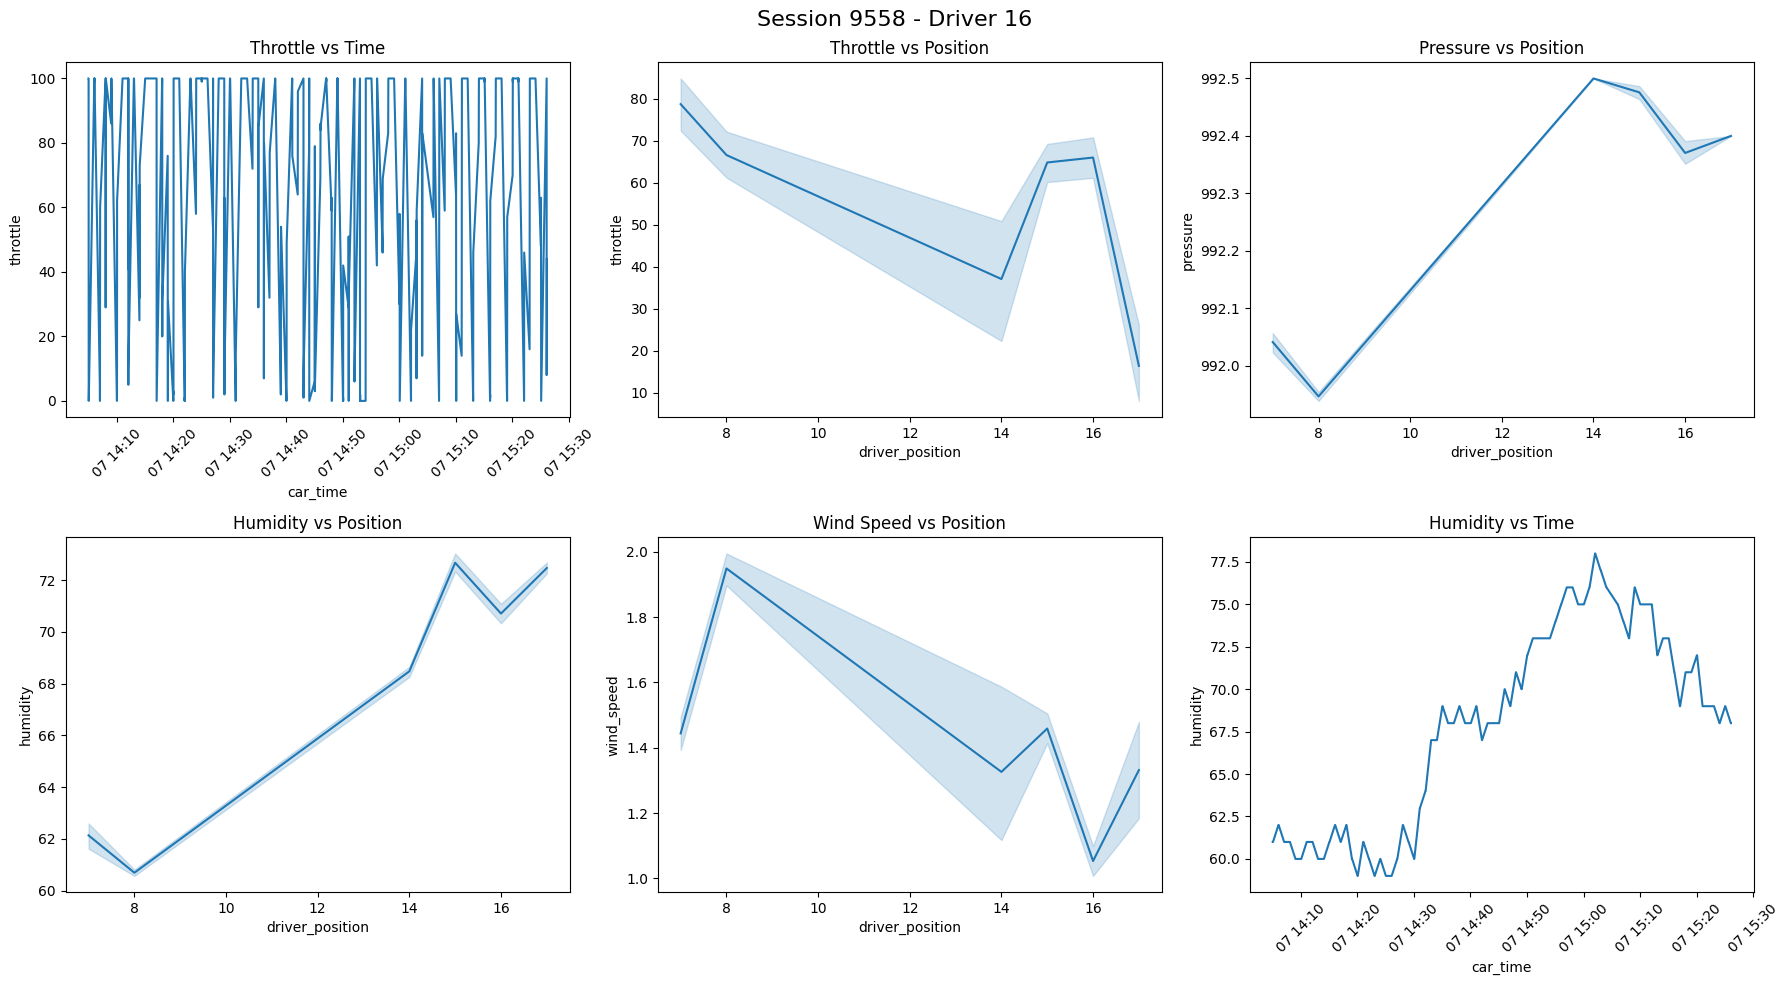

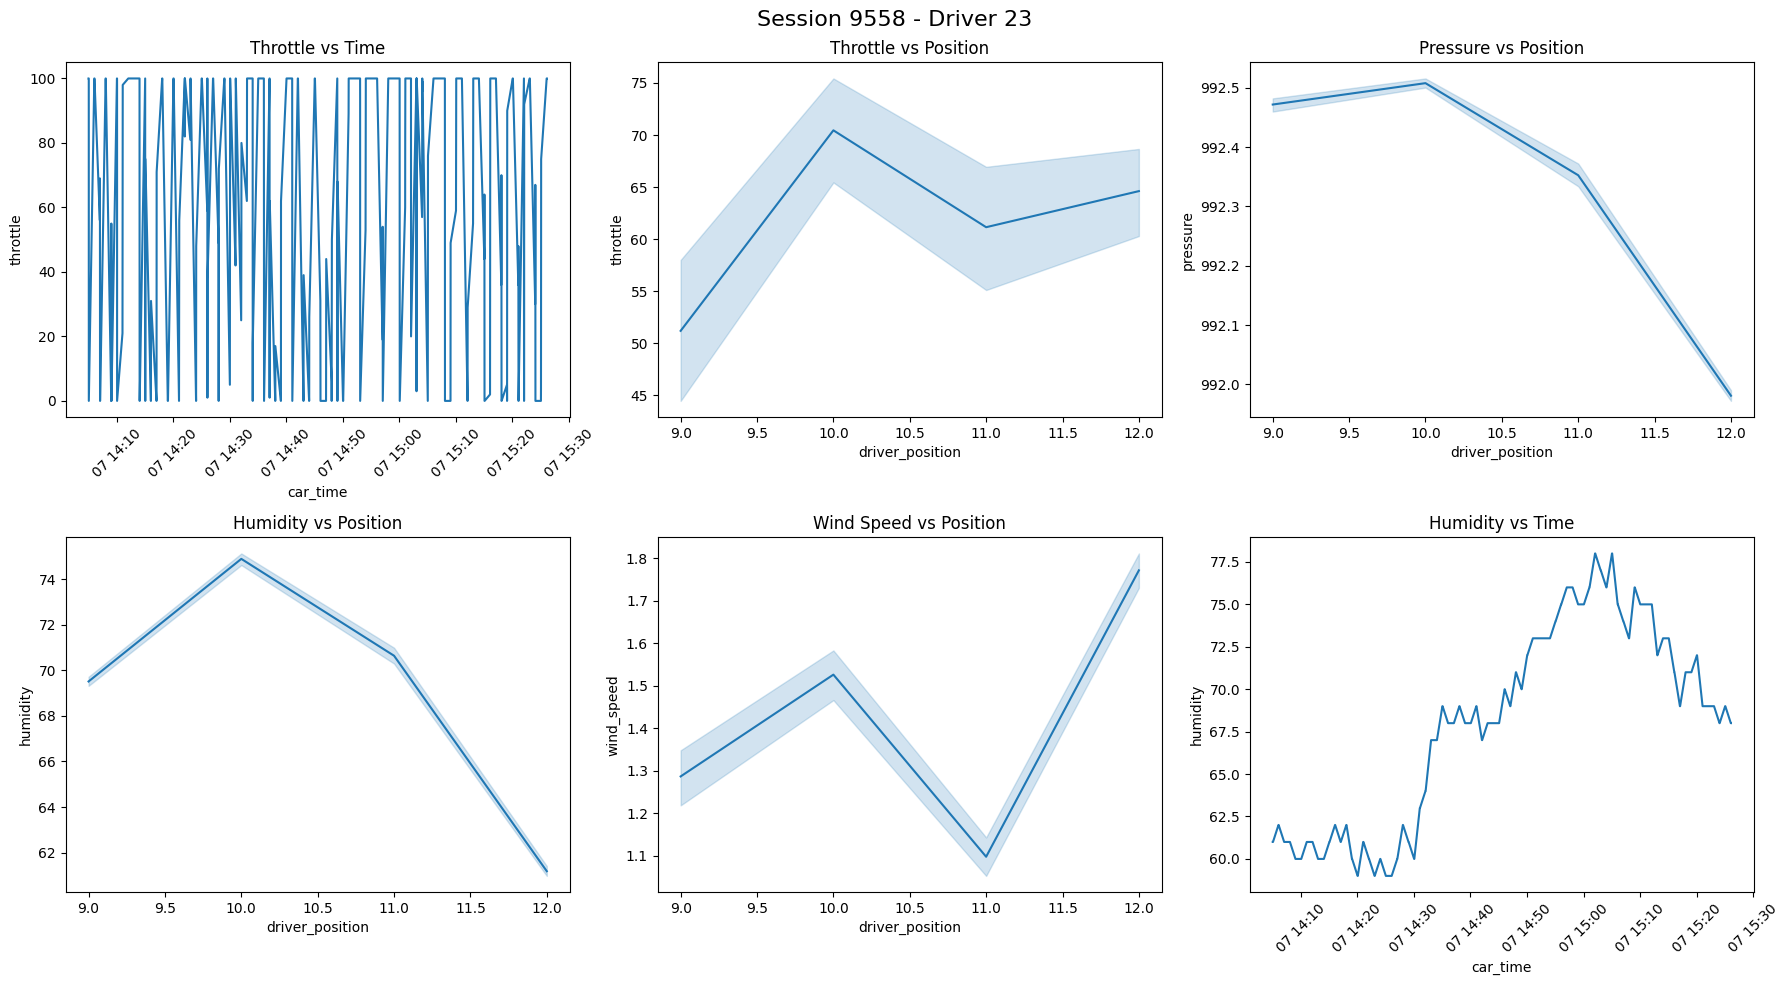

In [ ]:
# Plotting throttle vs time, throttle vs position, pressure vs position, and humidity vs position, wind_speed vs position, and humidity vs time for all the 3 drivers

import matplotlib.pyplot as plt
import seaborn as sns


drivers_data = {
    9625: {1: df1s1, 16: df16s1, 23: df23s1},
    9507: {1: df1s2, 16: df16s2},
    9558: {1: df1s3, 16: df16s3, 23: df23s3}
}

for session_key, drivers in drivers_data.items():
  for driver_number, driver_df in drivers.items():
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Session {session_key} - Driver {driver_number}", fontsize=16)

    #Plot 1: Throttle vs Time
    sns.lineplot(x='car_time', y='throttle', data=driver_df, ax=axes[0, 0])
    axes[0, 0].set_title('Throttle vs Time')
    axes[0,0].tick_params(axis='x', rotation=45)

    #Plot 2: Throttle vs Position
    sns.lineplot(x='driver_position', y='throttle', data=driver_df, ax=axes[0, 1])
    axes[0, 1].set_title('Throttle vs Position')

    #Plot 3: Pressure vs Position
    sns.lineplot(x='driver_position', y='pressure', data=driver_df, ax=axes[0, 2])
    axes[0, 2].set_title('Pressure vs Position')

    #Plot 4: Humidity vs Position
    sns.lineplot(x='driver_position', y='humidity', data=driver_df, ax=axes[1, 0])
    axes[1, 0].set_title('Humidity vs Position')

    #Plot 5: Wind Speed vs Position
    sns.lineplot(x='driver_position', y='wind_speed', data=driver_df, ax=axes[1, 1])
    axes[1, 1].set_title('Wind Speed vs Position')

    #Plot 6: Humidity vs Time
    sns.lineplot(x='car_time', y='humidity', data=driver_df, ax=axes[1,2])
    axes[1,2].set_title('Humidity vs Time')
    axes[1,2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


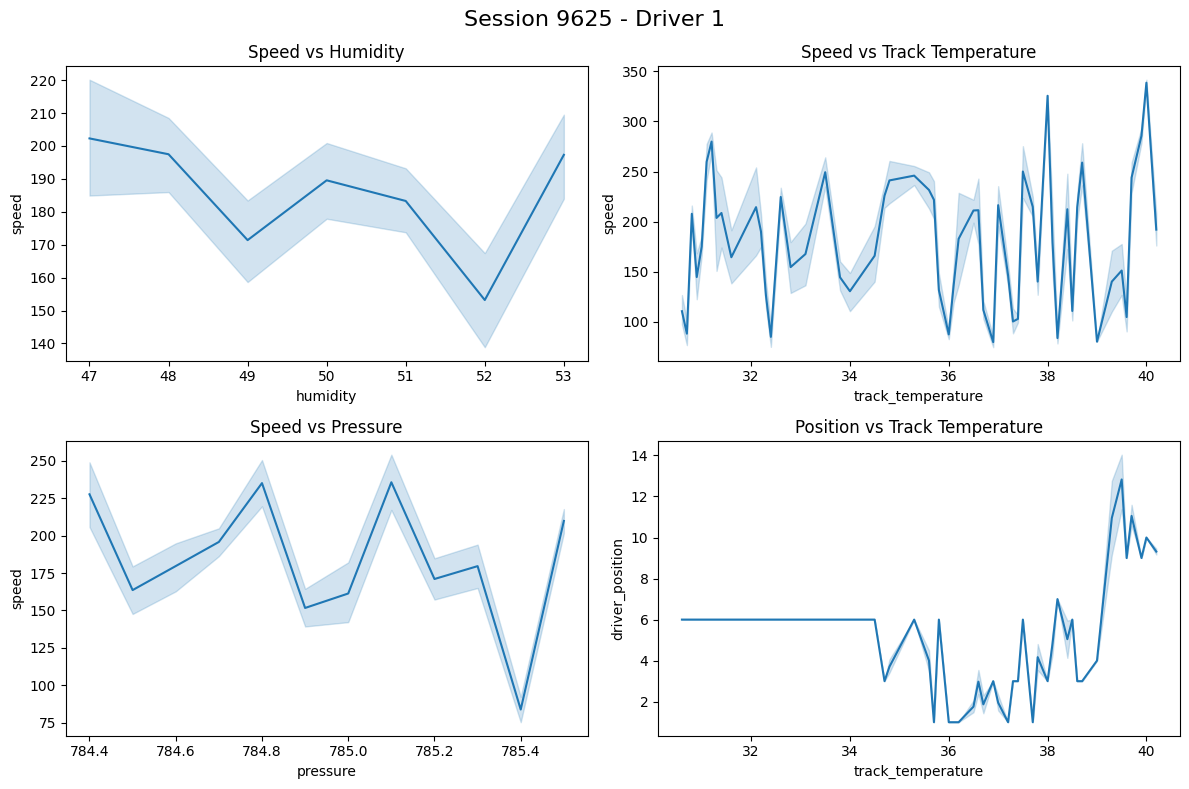

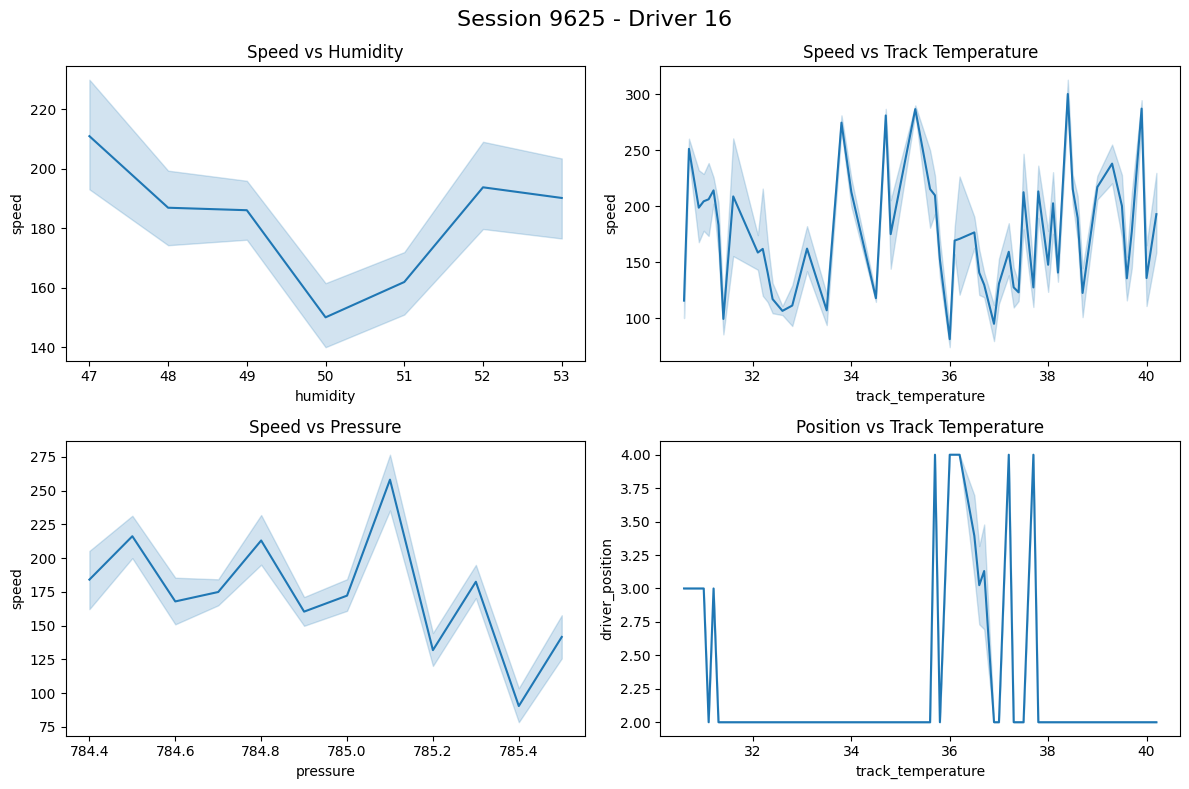

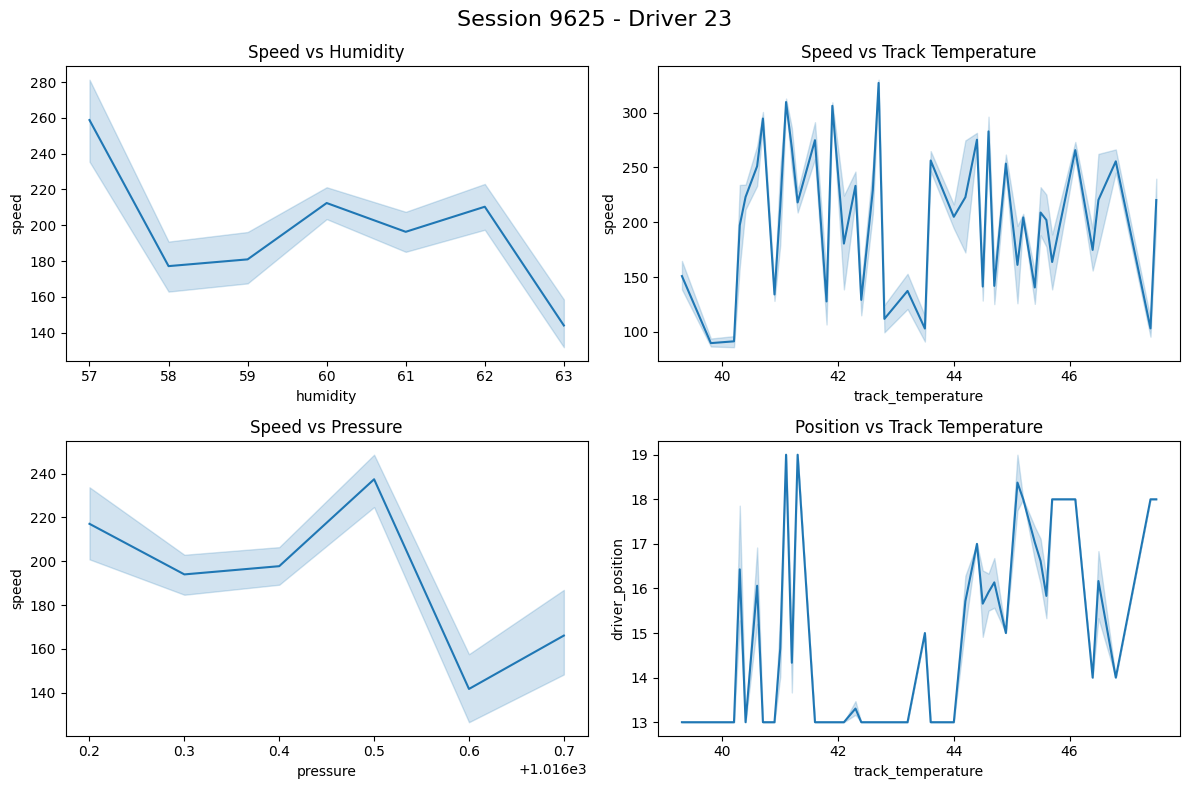

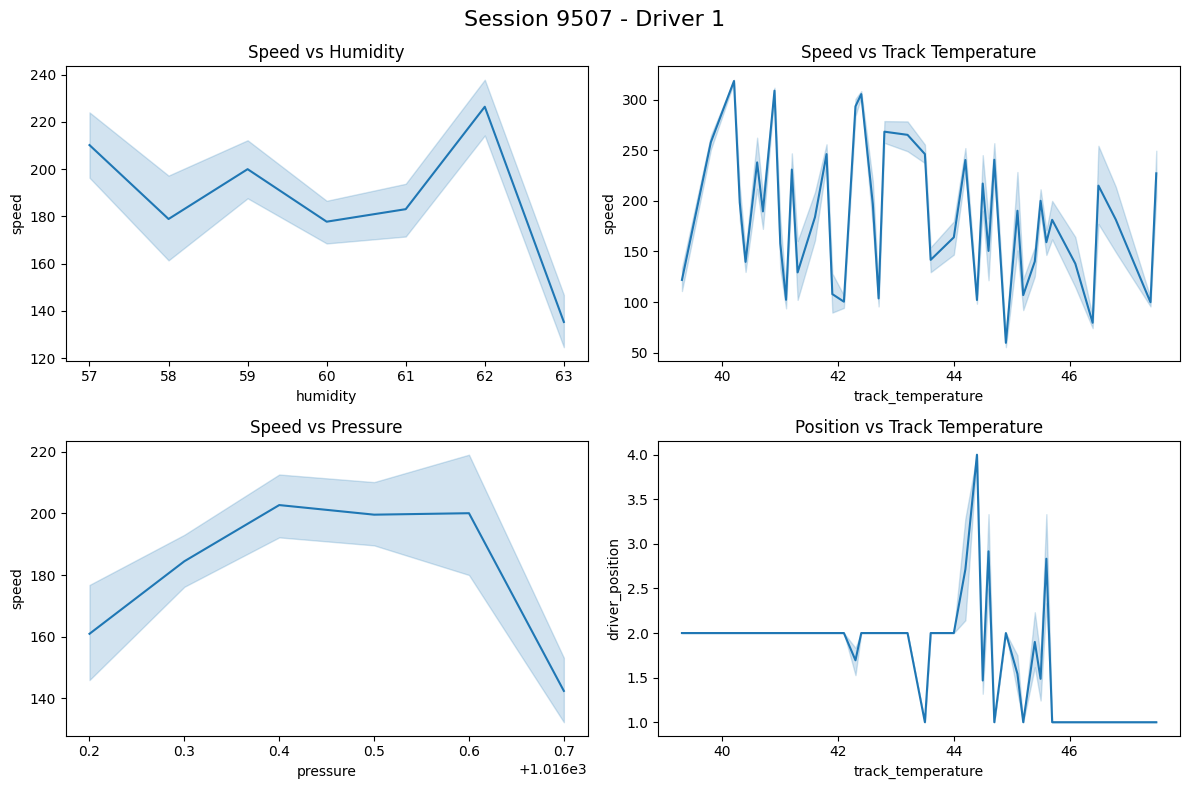

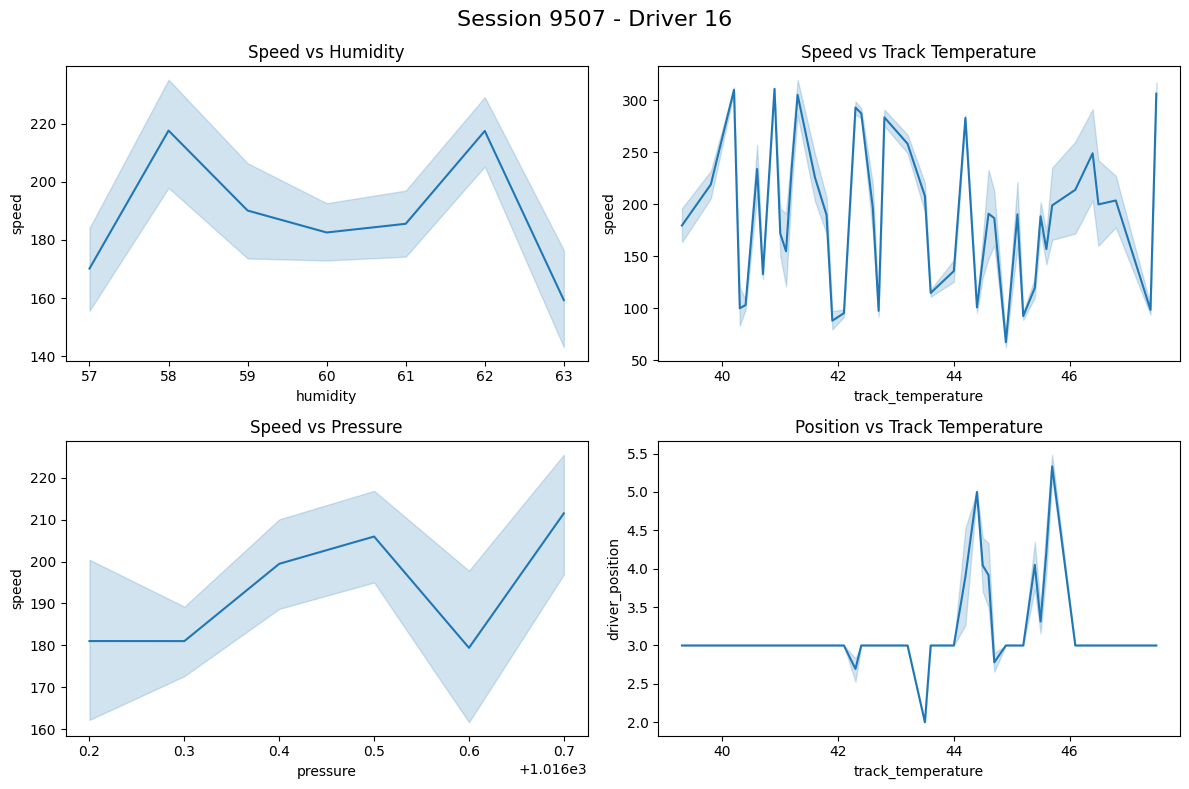

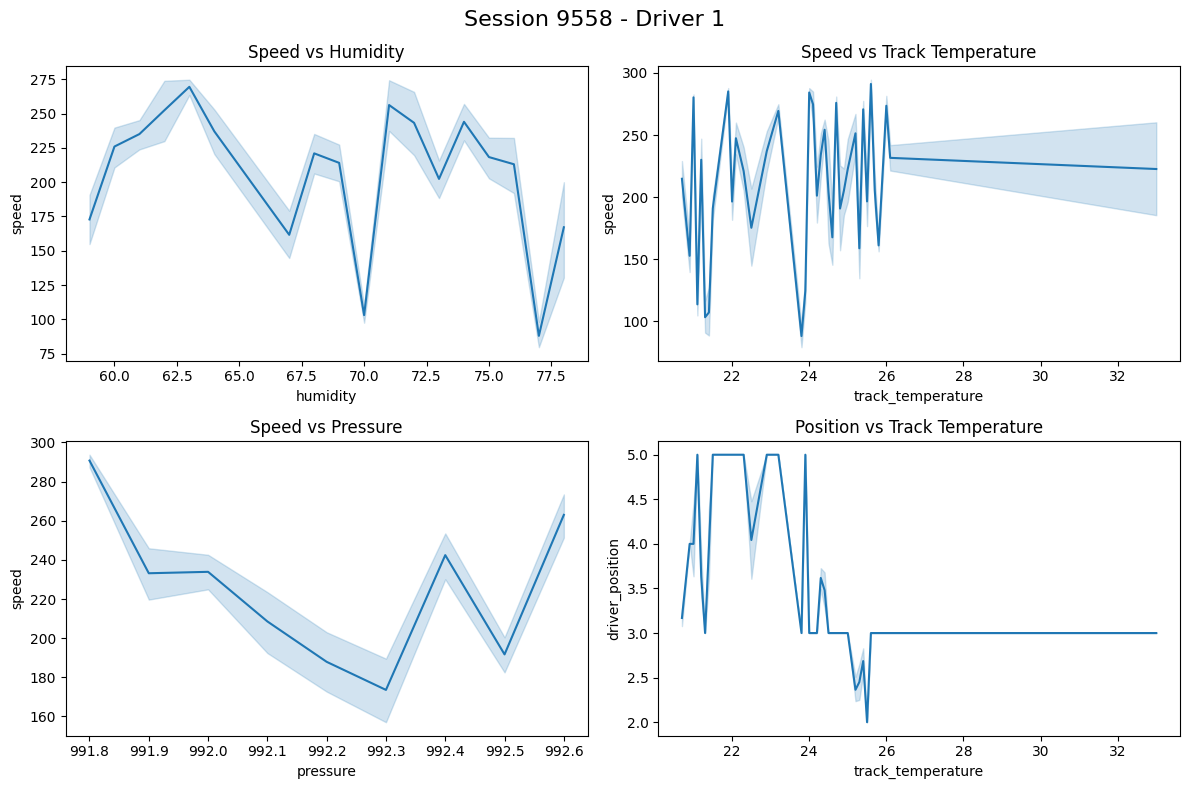

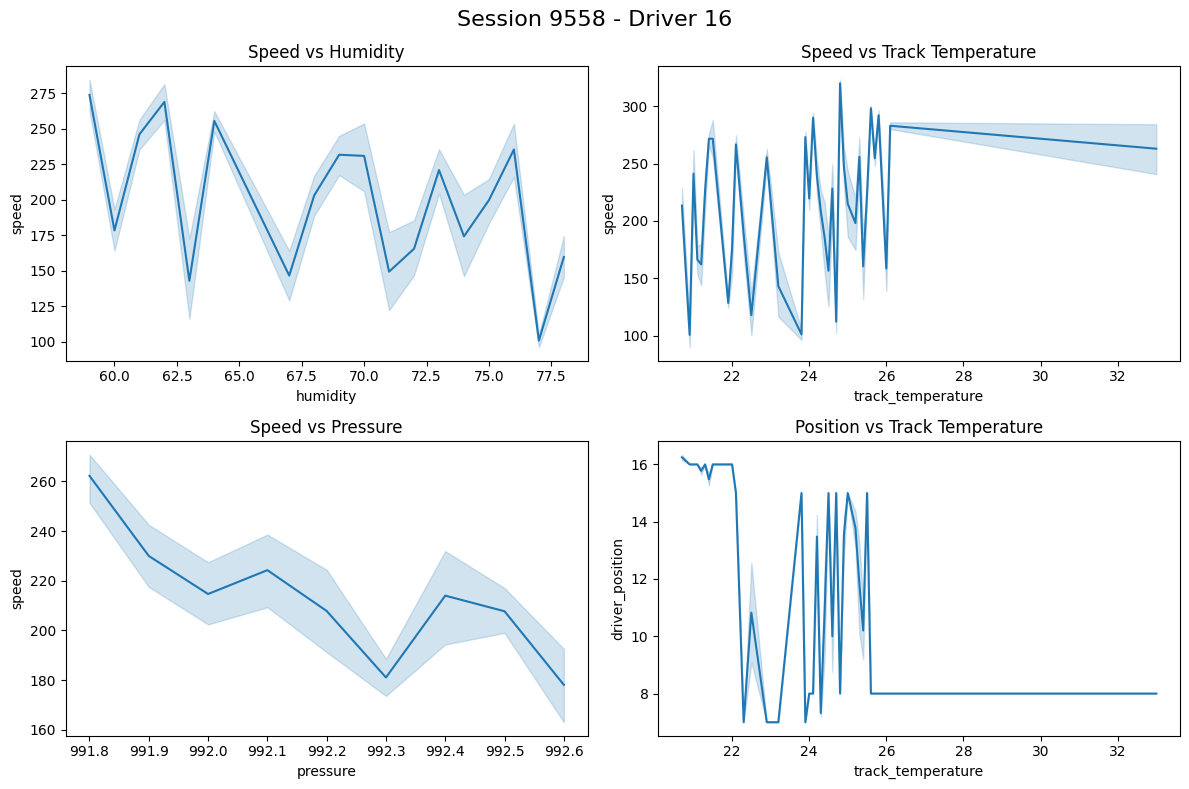

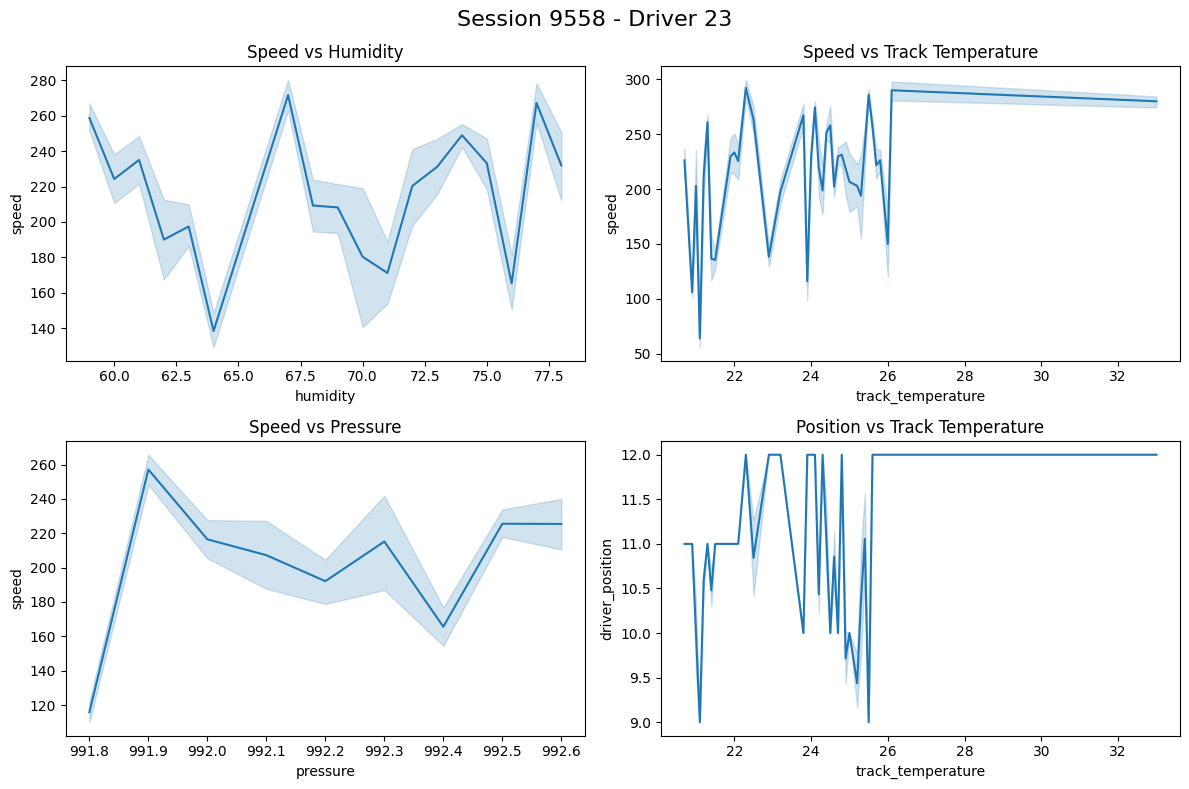

In [ ]:
# line plots of speed vs humidity, speed vs track temperature, speed vs pressure position vs track temperature for all drivers

import matplotlib.pyplot as plt
import seaborn as sns


drivers_data = {
    9625: {1: df1s1, 16: df16s1, 23: df23s1},
    9507: {1: df1s2, 16: df16s2},
    9558: {1: df1s3, 16: df16s3, 23: df23s3}
}

for session_key, drivers in drivers_data.items():
    for driver_number, driver_df in drivers.items():
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        fig.suptitle(f"Session {session_key} - Driver {driver_number}", fontsize=16)

        # Speed vs Humidity
        sns.lineplot(x='humidity', y='speed', data=driver_df, ax=axes[0, 0])
        axes[0, 0].set_title('Speed vs Humidity')

        # Speed vs Track Temperature
        sns.lineplot(x='track_temperature', y='speed', data=driver_df, ax=axes[0, 1])
        axes[0, 1].set_title('Speed vs Track Temperature')

        # Speed vs Pressure
        sns.lineplot(x='pressure', y='speed', data=driver_df, ax=axes[1, 0])
        axes[1, 0].set_title('Speed vs Pressure')

        # Position vs Track Temperature
        sns.lineplot(x='track_temperature', y='driver_position', data=driver_df, ax=axes[1, 1])
        axes[1, 1].set_title('Position vs Track Temperature')

        plt.tight_layout()
        plt.show()


In [ ]:
df1s1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1123 entries, 2024-10-27 20:05:22.135000+00:00 to 2024-10-27 21:45:28.716000+00:00
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_key          1123 non-null   int64  
 1   driver_number        1123 non-null   int64  
 2   lap_number           1123 non-null   int64  
 3   rpm                  1123 non-null   int64  
 4   speed                1123 non-null   int64  
 5   n_gear               1123 non-null   int64  
 6   throttle             1123 non-null   int64  
 7   brake                1123 non-null   int64  
 8   drs                  1123 non-null   int64  
 9   car_meeting_key      1123 non-null   int64  
 10  humidity             1123 non-null   float64
 11  pressure             1123 non-null   float64
 12  rainfall             1123 non-null   int64  
 13  track_temperature    1123 non-null   float64
 14  wind_direction       1123 

In [ ]:
df1s1['lap_number'].value_counts()

lap_number
2     36
63    27
20    25
57    25
15    25
      ..
55    10
53     9
41     9
62     9
64     8
Name: count, Length: 70, dtype: int64

In [ ]:
df23s3['brake'].value_counts()

brake
0      742
100    180
Name: count, dtype: int64

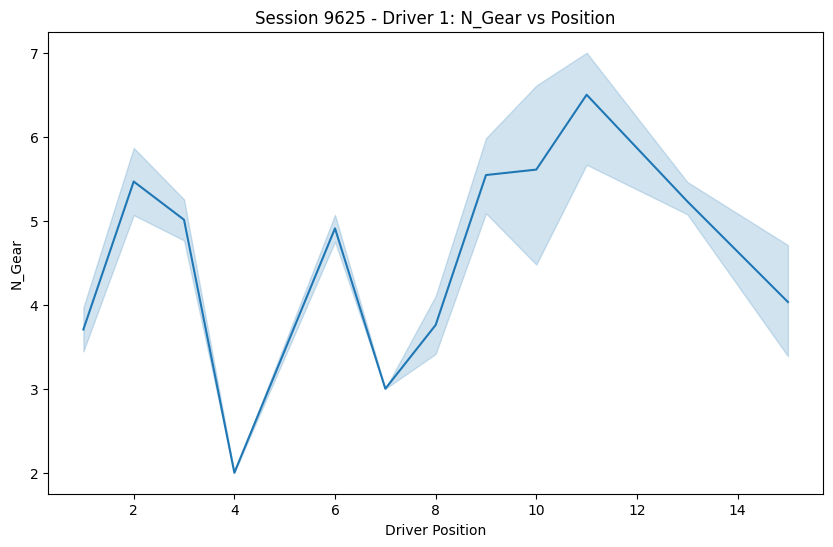

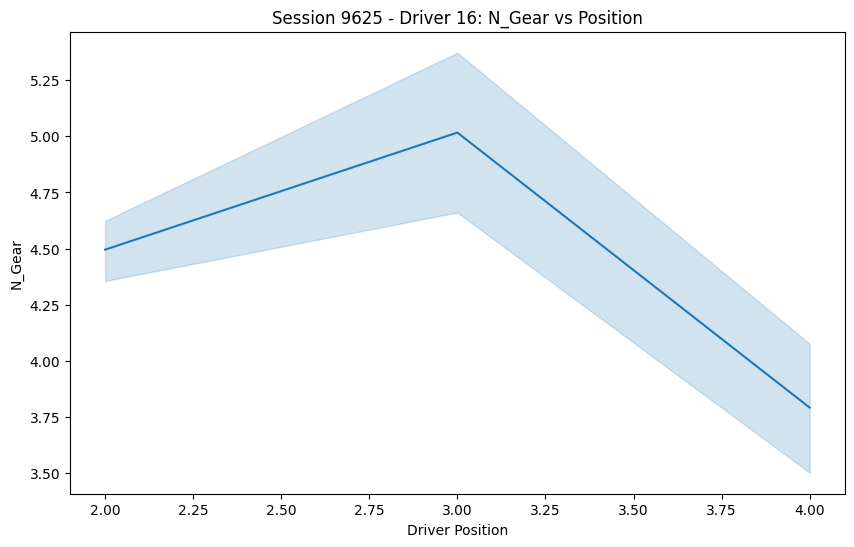

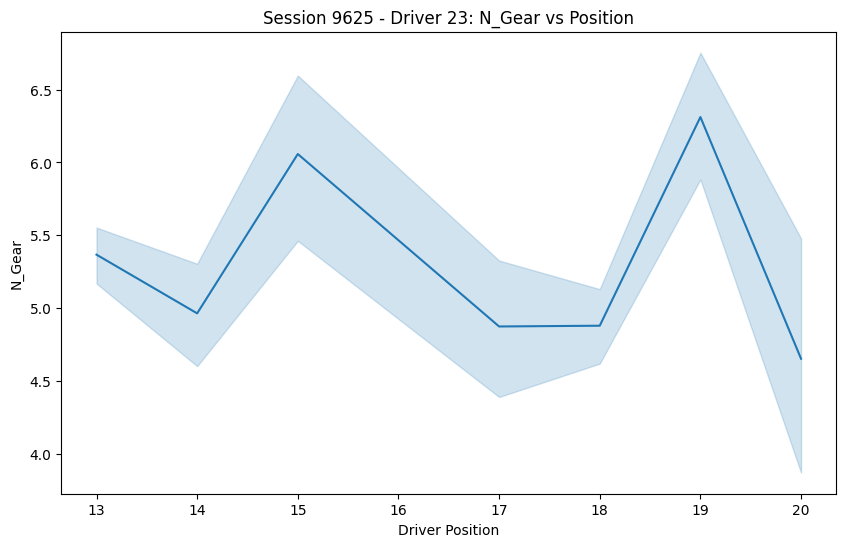

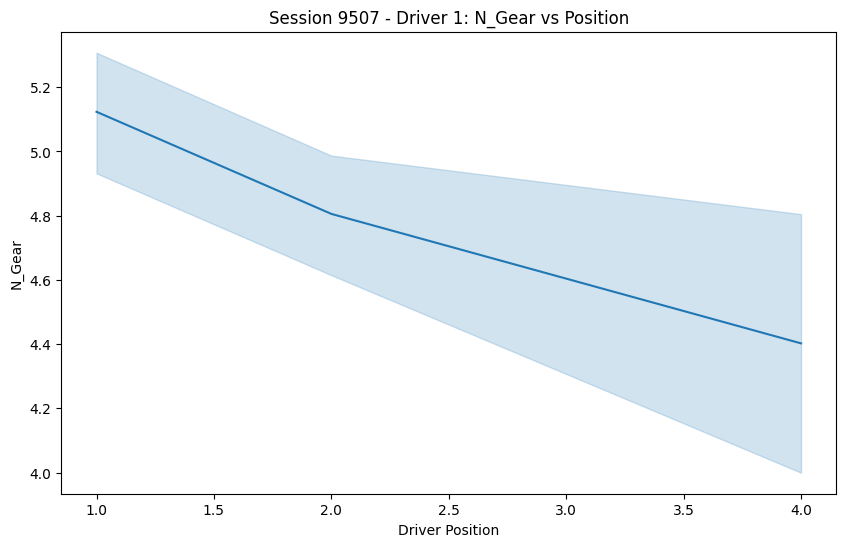

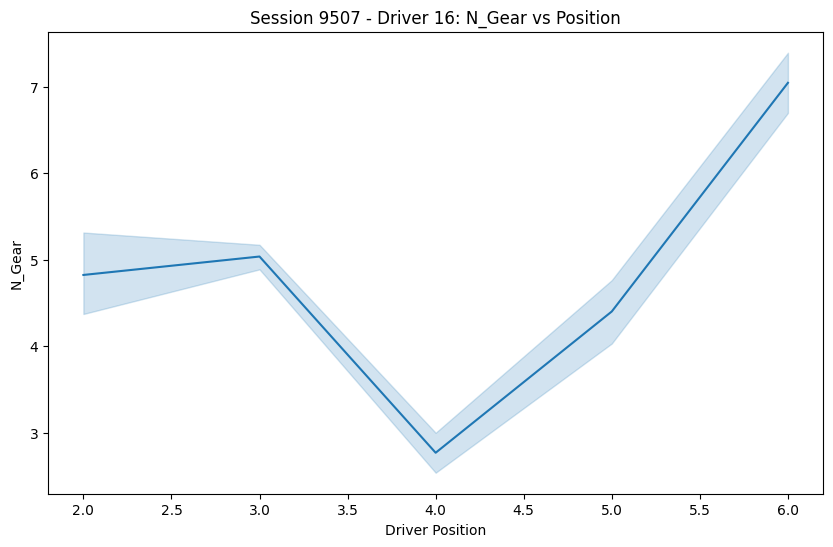

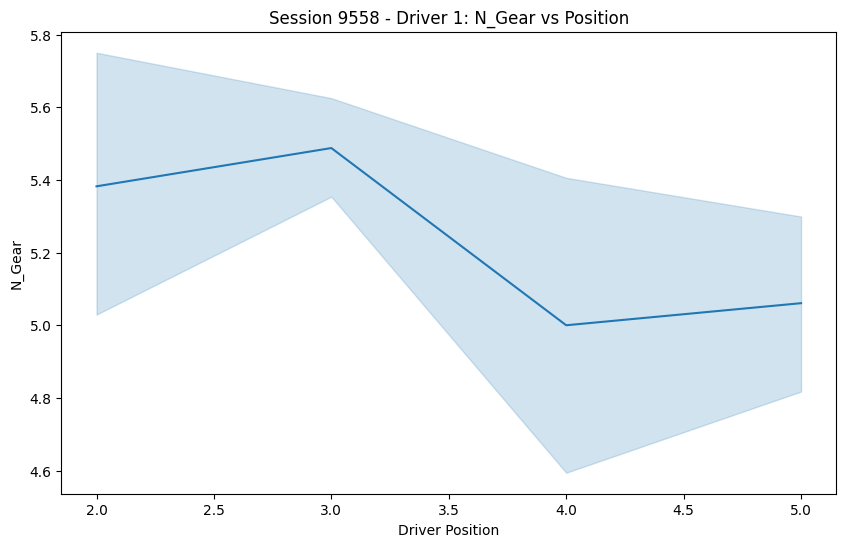

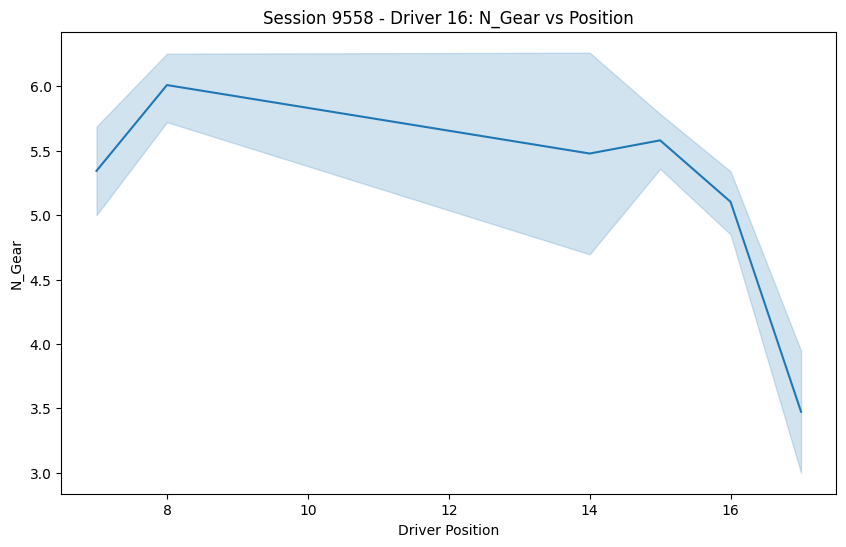

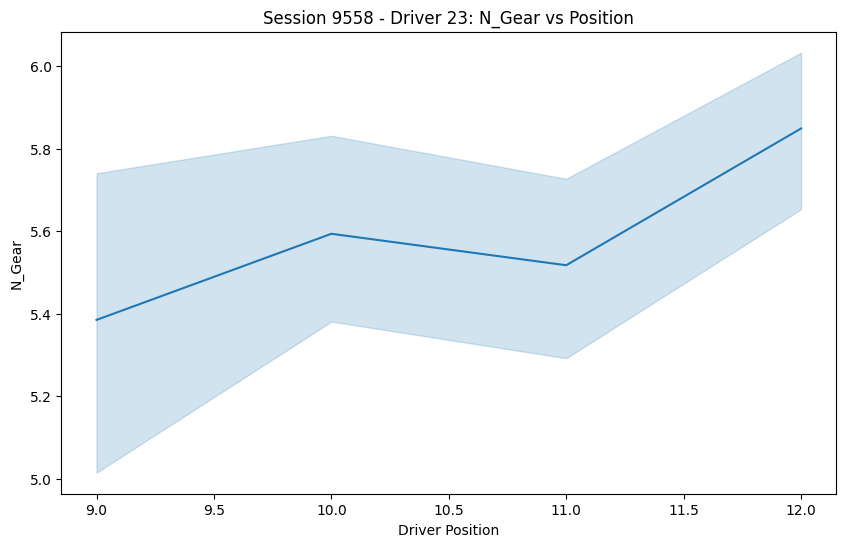

In [ ]:
# prompt: plot n_gear vs position for all drivers

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1s1, df16s1, df23s1, df1s2, df16s2, df1s3, df16s3, and df23s3 are defined

drivers_data = {
    9625: {1: df1s1, 16: df16s1, 23: df23s1},
    9507: {1: df1s2, 16: df16s2},
    9558: {1: df1s3, 16: df16s3, 23: df23s3}
}

for session_key, drivers in drivers_data.items():
    for driver_number, driver_df in drivers.items():
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='driver_position', y='n_gear', data=driver_df)
        plt.title(f'Session {session_key} - Driver {driver_number}: N_Gear vs Position')
        plt.xlabel('Driver Position')
        plt.ylabel('N_Gear')
        plt.show()


#Transformation begins here

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Features for LSTM input (excluding 'driver_position' and time columns)
features = ['speed', 'throttle', 'rpm', 'lap_duration', 'pit_duration', 'track_temperature',
            'humidity', 'wind_speed', 'duration_sector_1', 'duration_sector_2',
            'duration_sector_3', 'n_gear', 'i2_speed']

# Extract the relevant columns and drop rows with missing data
df_lstm = df1s1[['time', 'driver_number', 'lap_number', 'driver_position'] + features].dropna()

# Normalize the feature columns (min-max normalization)
scaler = MinMaxScaler(feature_range=(0, 1))
df_lstm[features] = scaler.fit_transform(df_lstm[features])

# Prepare sequences for LSTM model: past n laps to predict next lap's position
n_steps = 10  # number of previous laps to use for predicting the next lap

# Convert the data into sequences
def create_sequences(data, n_steps):
    sequences = []
    labels = []

    for i in range(n_steps, len(data)):
        seq = data[i-n_steps:i, :-1]  # last column is the label (driver_position)
        label = data[i, -1]  # the current position (driver_position)
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Select only relevant columns for LSTM (drop 'car_time' and 'lap_number' for modeling)
data_for_modeling = df_lstm[features + ['driver_position']].values

# Create sequences for LSTM
X, y = create_sequences(data_for_modeling, n_steps)

# Inspect the shape of the sequences and labels
X.shape, y.shape


((1113, 10, 13), (1113,))

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define a model-building function for the tuner
def build_model(hp):
    model = Sequential()

    # Tune the number of LSTM units
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   activation='relu',
                   input_shape=(X.shape[1], X.shape[2]),
                   return_sequences=False))

    # Tune dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer
    model.add(Dense(1))

    # Tune learning rate for the Adam optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')

    return model

# Instantiate the tuner with RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Optimize for validation loss
    max_trials=5,           # Number of different models to try
    executions_per_trial=1, # Number of models trained per trial
    directory='project_dir',
    project_name='LSTM_random_search'
)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Retrieve the best model and print the summary
best_model = tuner.get_best_models()[0]
best_model.summary()

# You can now train the best model on the full dataset if needed


Trial 5 Complete [00h 00m 07s]
val_loss: 4.592414855957031

Best val_loss So Far: 0.2605240046977997
Total elapsed time: 00h 00m 48s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,701 (178.52 KB)

 Trainable params: 45,701 (178.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming you have already created df1s1 (Driver 1, Session 1) dataset
# List of features we want to use for prediction
features = ['speed', 'throttle', 'rpm', 'lap_duration', 'pit_duration', 'track_temperature',
            'humidity', 'wind_speed', 'duration_sector_1', 'duration_sector_2',
            'duration_sector_3', 'n_gear', 'i2_speed']

# Normalize the features for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
df1s1[features] = scaler.fit_transform(df1s1[features])

# Extract target (driver_position) and create the dataset for LSTM
target = 'driver_position'

# Function to create sequences
def create_sequences(data, n_steps, target_col):
    sequences = []
    labels = []

    for i in range(n_steps, len(data)):
        seq = data[i-n_steps:i, :-1]  # Use all feature columns (excluding the target column)
        label = data[i, -1]  # The current driver position
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Prepare the data for LSTM (features + target)
df1s1_data = df1s1[features + [target]].values

# Create sequences and labels
n_steps = 10  # Number of previous laps to use for predicting the next lap's position
X1s1, y1s1 = create_sequences(df1s1_data, n_steps, target)

# Check the shape of the created sequences and labels
X1s1.shape, y1s1.shape


((1113, 10, 13), (1113,))

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # Tune the number of LSTM units
    model.add(LSTM(units=hp.Int('units', min_value=50, max_value=200, step=50),
                   activation='relu',
                   input_shape=(X_train.shape[1], X_train.shape[2])))

    # Tune dropout rate
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Dense layer to output driver position
    model.add(Dense(1))

    # Tune learning rate for the Adam optimizer
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
                  loss='mean_squared_error')

    return model

# Instantiate the tuner with RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',  # Optimize for validation loss
    max_trials=5,           # Number of different models to try
    executions_per_trial=1, # Number of models trained per trial
    directory='project_dir',
    project_name='LSTM_random_search'
)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X1s1, y1s1, test_size=0.2, shuffle=False)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Retrieve the best model and print the summary
best_model = tuner.get_best_models()[0]
best_model.summary()


Reloading Tuner from project_dir/LSTM_random_search/tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        45,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,701 (178.52 KB)

 Trainable params: 45,701 (178.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the best model
history = best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

Epoch 1/10
28/28 - 3s - 91ms/step - loss: 8.8578 - val_loss: 0.5039
Epoch 2/10
28/28 - 1s - 35ms/step - loss: 2.9747 - val_loss: 0.4193
Epoch 3/10
28/28 - 0s - 13ms/step - loss: 2.0466 - val_loss: 1.1543
Epoch 4/10
28/28 - 0s - 13ms/step - loss: 1.8112 - val_loss: 0.4423
Epoch 5/10
28/28 - 1s - 23ms/step - loss: 1.6953 - val_loss: 0.2840
Epoch 6/10
28/28 - 0s - 12ms/step - loss: 1.7816 - val_loss: 2.8032
Epoch 7/10
28/28 - 0s - 13ms/step - loss: 1.8319 - val_loss: 3.4899
Epoch 8/10
28/28 - 0s - 13ms/step - loss: 1.8581 - val_loss: 0.1941
Epoch 9/10
28/28 - 0s - 12ms/step - loss: 1.8409 - val_loss: 0.5626
Epoch 10/10
28/28 - 1s - 23ms/step - loss: 1.7069 - val_loss: 0.7782


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5454 
Validation Loss: 0.7781630754470825
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


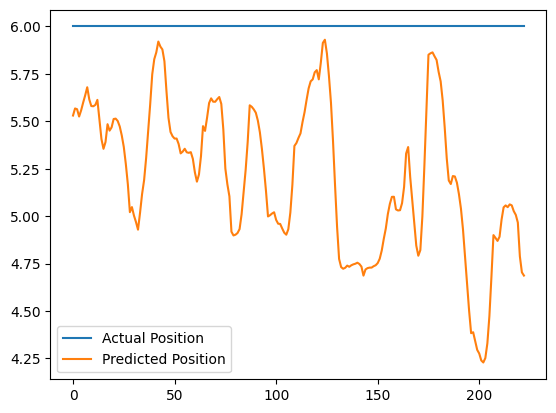

In [ ]:
# Evaluate the model on validation data
val_loss = best_model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Make predictions for the next lap position
predictions = best_model.predict(X_val)

# If you'd like to visualize predictions vs. actual values, you can plot them:
import matplotlib.pyplot as plt

plt.plot(y_val, label='Actual Position')
plt.plot(predictions, label='Predicted Position')
plt.legend()
plt.show()


Epoch 1/10
28/28 - 3s - 93ms/step - loss: 24.8786 - val_loss: 16.3276
Epoch 2/10
28/28 - 0s - 11ms/step - loss: 15.4882 - val_loss: 4.6510
Epoch 3/10
28/28 - 0s - 10ms/step - loss: 13.1680 - val_loss: 2.4797
Epoch 4/10
28/28 - 0s - 11ms/step - loss: 11.1604 - val_loss: 1.7508
Epoch 5/10
28/28 - 0s - 12ms/step - loss: 10.4507 - val_loss: 1.8029
Epoch 6/10
28/28 - 0s - 15ms/step - loss: 9.9898 - val_loss: 1.0747
Epoch 7/10
28/28 - 0s - 14ms/step - loss: 9.9103 - val_loss: 0.1368
Epoch 8/10
28/28 - 0s - 13ms/step - loss: 9.9141 - val_loss: 0.9635
Epoch 9/10
28/28 - 0s - 17ms/step - loss: 9.7630 - val_loss: 0.0649
Epoch 10/10
28/28 - 1s - 20ms/step - loss: 9.8943 - val_loss: 1.9440
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.9265 
Validation Loss: 1.944029450416565
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


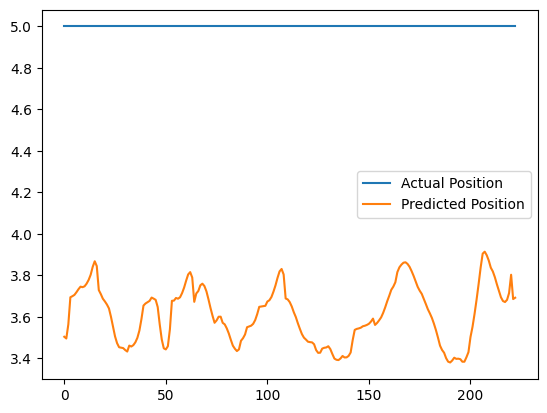

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# List of features for the LSTM model
features = ['speed', 'lap_duration', 'n_gear']

# Normalize the features (using MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))
df1s1[features] = scaler.fit_transform(df1s1[features])

# Prepare the target (driver_position_class) as a continuous variable for regression
df1s1['driver_position_class'] = df1s1['driver_position'] - 1  # Make positions 0-indexed

# Prepare data for LSTM: Create sequences
n_steps = 10  # Number of previous laps to use for prediction
def create_sequences(data, n_steps, target_col):
    sequences = []
    labels = []

    for i in range(n_steps, len(data)):
        seq = data[i-n_steps:i, :-1]  # Use all feature columns (excluding the target column)
        label = data[i, -1]  # The current driver position (continuous for regression)
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Prepare the data for LSTM (features + target)
df1s1_data = df1s1[features + ['driver_position_class']].values

# Create sequences and labels for regression
X1s1, y1s1 = create_sequences(df1s1_data, n_steps, 'driver_position_class')

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X1s1, y1s1, test_size=0.2, shuffle=False)

# Build the LSTM regression model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Output layer for regression (no activation function)
model.add(Dense(1))  # Single neuron for predicting the driver position (continuous)

# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Make predictions on validation data
predictions = model.predict(X_val)

# Visualize predictions vs. actual values
import matplotlib.pyplot as plt

plt.plot(y_val, label='Actual Position')
plt.plot(predictions, label='Predicted Position')
plt.legend()
plt.show()


Epoch 1/10
28/28 - 4s - 128ms/step - loss: 25.8419 - val_loss: 19.9199
Epoch 2/10
28/28 - 1s - 24ms/step - loss: 17.9533 - val_loss: 7.6603
Epoch 3/10
28/28 - 1s - 38ms/step - loss: 14.2925 - val_loss: 5.7476
Epoch 4/10
28/28 - 1s - 18ms/step - loss: 12.5888 - val_loss: 3.0083
Epoch 5/10
28/28 - 1s - 18ms/step - loss: 11.2046 - val_loss: 1.2048
Epoch 6/10
28/28 - 1s - 24ms/step - loss: 10.2001 - val_loss: 0.1919
Epoch 7/10
28/28 - 0s - 16ms/step - loss: 9.8662 - val_loss: 1.0335
Epoch 8/10
28/28 - 1s - 26ms/step - loss: 9.8424 - val_loss: 0.8115
Epoch 9/10
28/28 - 1s - 21ms/step - loss: 9.5953 - val_loss: 0.1353
Epoch 10/10
28/28 - 1s - 22ms/step - loss: 9.7611 - val_loss: 1.0375
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0374
Validation Loss: 1.037493109703064


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


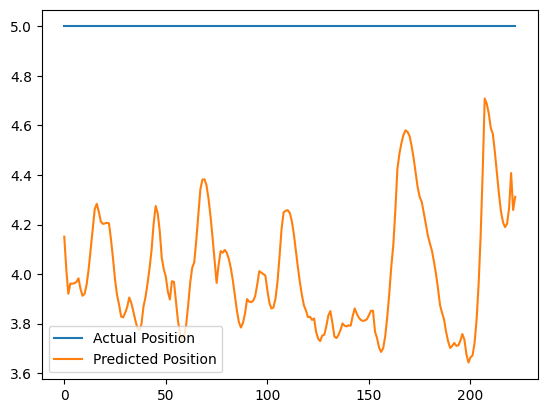

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


# List of features for the LSTM model
features = ['speed', 'lap_duration', 'n_gear']

# Normalize the features (using MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))
df1s2[features] = scaler.fit_transform(df1s2[features])

# Prepare the target (driver_position_class) as a continuous variable for regression
df1s2['driver_position_class'] = df1s1['driver_position'] - 1  # Make positions 0-indexed

# Prepare data for LSTM: Create sequences
n_steps = 10  # Number of previous laps to use for prediction
def create_sequences(data, n_steps, target_col):
    sequences = []
    labels = []

    for i in range(n_steps, len(data)):
        seq = data[i-n_steps:i, :-1]  # Use all feature columns (excluding the target column)
        label = data[i, -1]  # The current driver position (continuous for regression)
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Prepare the data for LSTM (features + target)
df1s1_data = df1s1[features + ['driver_position_class']].values

# Create sequences and labels for regression
X1s1, y1s1 = create_sequences(df1s1_data, n_steps, 'driver_position_class')

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X1s1, y1s1, test_size=0.2, shuffle=False)

# Build the LSTM regression model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Output layer for regression (no activation function)
model.add(Dense(1))  # Single neuron for predicting the driver position (continuous)

# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Make predictions on validation data
predictions = model.predict(X_val)

# Visualize predictions vs. actual values
import matplotlib.pyplot as plt

plt.plot(y_val, label='Actual Position')
plt.plot(predictions, label='Predicted Position')
plt.legend()
plt.show()


Epoch 1/10
28/28 - 6s - 205ms/step - loss: 12.8432 - val_loss: 0.0224
Epoch 2/10
28/28 - 1s - 38ms/step - loss: 2.0345 - val_loss: 0.4550
Epoch 3/10
28/28 - 1s - 27ms/step - loss: 1.4490 - val_loss: 0.1098
Epoch 4/10
28/28 - 1s - 23ms/step - loss: 1.5043 - val_loss: 0.0169
Epoch 5/10
28/28 - 1s - 24ms/step - loss: 1.2901 - val_loss: 0.0184
Epoch 6/10
28/28 - 1s - 39ms/step - loss: 1.0277 - val_loss: 0.0257
Epoch 7/10
28/28 - 1s - 22ms/step - loss: 0.9129 - val_loss: 0.0131
Epoch 8/10
28/28 - 1s - 23ms/step - loss: 1.0243 - val_loss: 0.0337
Epoch 9/10
28/28 - 1s - 27ms/step - loss: 0.8203 - val_loss: 0.0240
Epoch 10/10
28/28 - 1s - 19ms/step - loss: 0.8699 - val_loss: 0.0160
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0148
Validation Loss: 0.01599113643169403
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


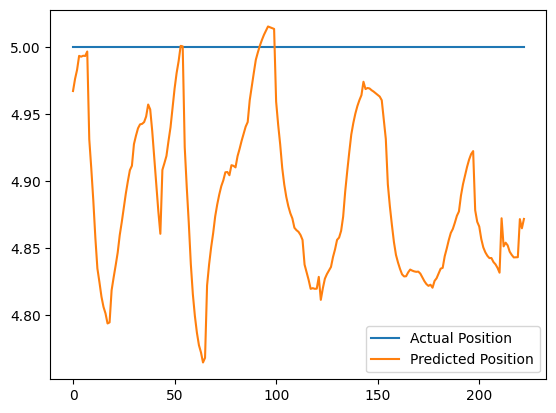

In [ ]:
# List of features for the LSTM model
features = ['speed', 'lap_duration', 'n_gear', 'driver_position_class']  # Include 'driver_position_class' as a feature

# Normalize the features (using MinMaxScaler)
scaler = MinMaxScaler(feature_range=(0, 1))
df1s1[features] = scaler.fit_transform(df1s1[features])

# Prepare the target (driver_position_class) as a continuous variable for regression
df1s1['driver_position_class'] = df1s1['driver_position'] - 1  # Make positions 0-indexed

# Modify the create_sequences function to include previous driver_position_class
def create_sequences(data, n_steps, target_col):
    sequences = []
    labels = []

    for i in range(n_steps, len(data)):
        seq = data[i-n_steps:i, :]  # Use all feature columns (including driver_position_class)
        label = data[i, -1]  # The current driver position (continuous for regression)
        sequences.append(seq)
        labels.append(label)

    return np.array(sequences), np.array(labels)

# Prepare the data for LSTM (features + target)
df1s1_data = df1s1[features + ['driver_position_class']].values

# Create sequences and labels for regression
X1s1, y1s1 = create_sequences(df1s1_data, n_steps, 'driver_position_class')

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X1s1, y1s1, test_size=0.2, shuffle=False)

# Build the LSTM regression model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Output layer for regression (no activation function)
model.add(Dense(1))  # Single neuron for predicting the driver position (continuous)

# Compile the model using Adam optimizer and mean squared error loss
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

# Evaluate the model
val_loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}')

# Make predictions on validation data
predictions = model.predict(X_val)

# Visualize predictions vs. actual values
import matplotlib.pyplot as plt

plt.plot(y_val, label='Actual Position')
plt.plot(predictions, label='Predicted Position')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Position for next lap: [[4.9644876]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Positions for the next 5 laps: [np.float32(4.9644876), np.float32(5.3624854), np.float32(6.9225826), np.float32(8.364593), np.float32(10.681811)]


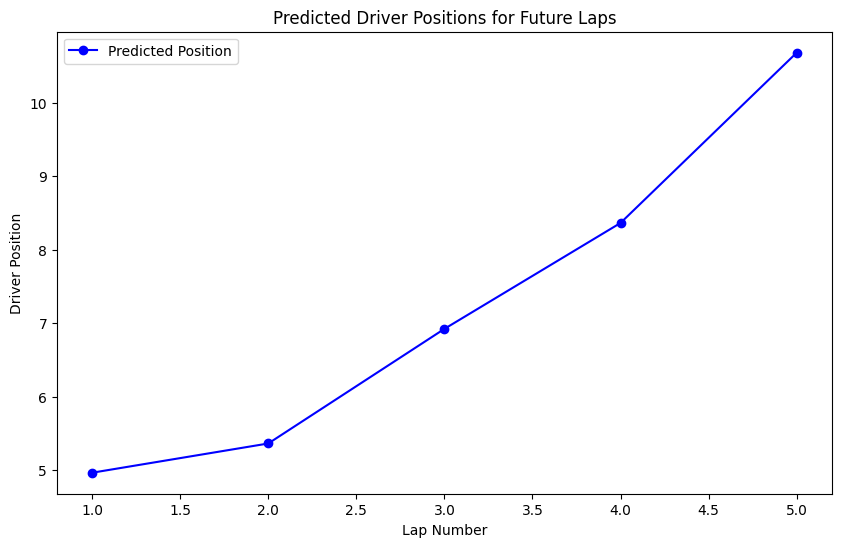

In [ ]:
# Function to predict the next lap's position
def predict_next_lap(model, last_sequence, n_steps):
    """
    Predict the next lap's driver position using the trained LSTM model.
    :param model: The trained LSTM model
    :param last_sequence: The last n_steps data used for prediction
    :param n_steps: Number of previous laps used for prediction
    :return: Predicted driver position for the next lap
    """
    # Reshape input data for LSTM (ensure it's 3D)
    last_sequence = np.reshape(last_sequence, (1, last_sequence.shape[0], last_sequence.shape[1]))

    # Predict next lap position
    prediction = model.predict(last_sequence)

    return prediction

# Start by using the last n_steps from the validation dataset or training dataset
last_sequence = X_val[-1]  # You can also use X_train[-1] for the most recent training data

# Predict the next lap's position
predicted_position = predict_next_lap(model, last_sequence, n_steps)
print(f"Predicted Position for next lap: {predicted_position}")

# Predict multiple future laps and store results
n_future_laps = 5  # Number of laps to predict
predicted_positions = []

for _ in range(n_future_laps):
    predicted_position = predict_next_lap(model, last_sequence, n_steps)
    predicted_positions.append(predicted_position[0][0])  # Append the predicted position (flatten to 1D)

    # Update the last_sequence with the new predicted position for the next lap
    # Reshape predicted_position to match the expected shape for last_sequence
    # predicted_position_reshaped = predicted_position.reshape(1, 1, 1)  # Reshape to match (1, 1, 1) # This line is no longer needed

    # Append the new prediction to last_sequence (removing the first column and adding the prediction)
    # last_sequence = np.append(last_sequence[:, 1:, :], predicted_position_reshaped, axis=1) # This line was causing the error

    # Update last_sequence for the next prediction (for 2D array)
    last_sequence = np.roll(last_sequence, -1, axis=0)  # Shift elements to the left
    last_sequence[-1] = np.append(last_sequence[-2, 1:], predicted_position[0][0]) # Replace last element with new prediction



# Print predicted positions for the next 5 laps
print("Predicted Positions for the next 5 laps:", predicted_positions)

# Plot the predicted positions
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_future_laps + 1), predicted_positions, marker='o', linestyle='-', color='b', label="Predicted Position")
plt.title("Predicted Driver Positions for Future Laps")
plt.xlabel("Lap Number")
plt.ylabel("Driver Position")
plt.legend()
plt.show()

In [ ]:
# Check unique values in 'driver_position_class'
print(f"Unique values in driver_position_class: {df1s1['driver_position_class'].unique()}")

# Replace driver_position_class values greater than 13 with 13
df1s1['driver_position_class'] = df1s1['driver_position_class'].apply(lambda x: 13 if x == 14 else x)

# Check the unique values after replacing
print(f"Unique values after replacing: {df1s1['driver_position_class'].unique()}")

# Prepare the data for LSTM: Create sequences
df1s1_data = df1s1[features + ['driver_position_class']].values

# Create sequences and labels for classification
X1s1, y1s1 = create_sequences(df1s1_data, n_steps, 'driver_position_class')

# Convert labels to one-hot encoding (for classification)
from tensorflow.keras.utils import to_categorical
y1s1 = to_categorical(y1s1, num_classes=14)  # 14 unique driver positions

# Check the shape of the one-hot encoded labels
print(f"One-hot encoded y1s1 shape: {y1s1.shape}")


Unique values in driver_position_class: [ 0  1  2  3  5 14 12 10  9  8  7  6]
Unique values after replacing: [ 0  1  2  3  5 13 12 10  9  8  7  6]
One-hot encoded y1s1 shape: (1113, 14)
